In [2]:
## Install and import packages
!pip install openmeteo-requests
!pip install requests-cache retry-requests

import pandas as pd
import os

## Access Google Drive for dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import seaborn as sns

In [4]:
!pip install squarify

In [5]:
pip install keras


In [6]:
!pip install plotly_express


In [7]:
pip install --upgrade tensorflow


In [8]:
pip install sklearn-keras

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation
from keras import optimizers
from keras.layers import TimeDistributed
from keras.layers import Flatten
from sklearn.metrics import accuracy_score
from keras.datasets import reuters
#from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
from keras.preprocessing import sequence
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle       # this is added for the rectanfgular plot
from numpy import array
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input  # this will be used in the CNN model bulding, for example, Input is the first line of the model
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation, TimeDistributed, Flatten, LSTM, Dropout, Embedding, Bidirectional
from keras import optimizers
from keras.datasets import reuters, imdb
from keras.utils import to_categorical
from keras.preprocessing import sequence
from sklearn.metrics import accuracy_score

In [10]:
# Special plot that makes the figure bigger
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

In [11]:
tf.random.set_seed(123)
SEED = 1000

# Final 2024 Data Processed

In [12]:
import pandas as pd

# Load the CSV files
# dengue = pd.read_csv("dengue.csv.gz")
# dengue24 = pd.read_csv("dengue_19ago2024.csv.gz")
path = '/content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengue2024 /info dengue data and model'
## # Load the dengue data into a DataFrame which was downloaded and unzipped from https://info.dengue.mat.br/minio/browser/sprint202425/climate.csv.gz
#file = 'dengue.csv'
file = 'dengue.csv'
#file = 'dengue_19ago2024.csv'
# Creating DataFrame
dengue = pd.read_csv(os.path.join(path, file), low_memory=False)
file = 'dengue_19ago2024.csv'
# Creating DataFrame
dengue24 = pd.read_csv(os.path.join(path, file), low_memory=False)
# Creating DataFrame
# df_19ago2024
# Filter the dengue DataFrame for years less than 2024
dengue_filtered = dengue[dengue['year'] < 2024]

# Remove the first column from dengue24 (assuming it's the 'Unnamed: 0' column)
dengue24_filtered = dengue24.iloc[:, 1:]

# Combine the two DataFrames using bind_rows concept (concatenation in pandas)
#dengue_combined = pd.concat([dengue_filtered, dengue24_filtered], ignore_index=True)
dengue_combined = pd.concat([dengue, dengue24], ignore_index=True)
# Display the first few rows of the combined DataFrame
# dengue_combined.head()

df = dengue_combined

# Extract unique federal unit names
uf_names = df['uf'].unique()

# Initialize an empty dictionary to store processed data for each federal unit
processed_data_dict = {}

# Loop through each federal unit and process the data
for uf in uf_names:
    duf = df[df['uf'] == uf].groupby(['epiweek']).agg({'casos': 'sum'}).reset_index()
    duf.rename(columns={'casos': uf}, inplace=True)
    processed_data_dict[uf] = duf.set_index('epiweek')

# Concatenate all processed data into a single DataFrame with epiweek as the index
final_df = pd.concat(processed_data_dict.values(), axis=1)

# Reset index to make epiweek a column again
final_df.reset_index(inplace=True)

# Ensure the epiweek column is sorted in order
final_df['epiweek'] = final_df['epiweek'].astype(int)
final_df = final_df.sort_values(by='epiweek').reset_index(drop=True)

# Display the final DataFrame
final_df


epiweek   SC   RS    MS    MT   PA   PB   PE   PI    PR  ...    GO    MG  \
0     201001   14   13  2515  4122  177   12  131   65   369  ...  5554  2794   
1     201002   27   17  3063  4130  257   28  147   72   386  ...  6930  3729   
2     201003   23   14  4045  3938  257   26  172   67   529  ...  7175  4656   
3     201004   16   13  4733  3629  268   56  225   94   716  ...  7317  6195   
4     201005   22   22  5135  3287  324   73  321  113   956  ...  7286  7179   
..       ...  ...  ...   ...   ...  ...  ...  ...  ...   ...  ...   ...   ...   
757   202428  865  273    63   393  206  178  941  176  1546  ...  1706  1343   
758   202429  700  278    68   282  187  224  862  185  1372  ...  1225   982   
759   202430  684  270    78   307  170  204  746  125  1612  ...   960   565   
760   202431  704   92    89   322  100  210  401   75   796  ...   755   385   
761   202432  391    0    34   109   15  110  117   31     1  ...   167    82   

       AC   AL     SP   SE   AM   AP   TO   DF  
0     869   93   3058   16  191   39  420  147  
1    1003  111   3980   22  183   60  450  275  
2    1010  176   4869   14   73   39  548  356  
3    1397  194   6445   13  100   55  597  461  
4    2000  289   8332    8  113  111  607  574  
..    ...  ...    ...  ...  ...  ...  ...  ...  
757    29  630  10117  136   85  119   40  274  
758    49  557   8195  144  114  108   35  182  
759    74  584   6748  128  115   55   44  183  
760    60  330   3243   97   92   25   67  189  
761     5   88    619   18   17    1   50   73  

[762 rows x 28 columns]

In [13]:
import pandas as pd

# Load the CSV files
# dengue = pd.read_csv("dengue.csv.gz")
# dengue24 = pd.read_csv("dengue_19ago2024.csv.gz")
path = '/content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengue2024 /info dengue data and model'
## # Load the dengue data into a DataFrame which was downloaded and unzipped from https://info.dengue.mat.br/minio/browser/sprint202425/climate.csv.gz
#file = 'dengue.csv'
file = 'dengue.csv'
#file = 'dengue_19ago2024.csv'
# Creating DataFrame
dengue = pd.read_csv(os.path.join(path, file), low_memory=False)
file = 'dengue_19ago2024.csv'
# Creating DataFrame
dengue24 = pd.read_csv(os.path.join(path, file), low_memory=False)
# Creating DataFrame
# df_19ago2024
# Filter the dengue DataFrame for years less than 2024
dengue_filtered = dengue[dengue['year'] < 2024]

# Remove the first column from dengue24 (assuming it's the 'Unnamed: 0' column)
dengue24_filtered = dengue24.iloc[:, 1:]

# Combine the two DataFrames using bind_rows concept (concatenation in pandas)
#dengue_combined = pd.concat([dengue_filtered, dengue24_filtered], ignore_index=True)
dengue_combined = pd.concat([dengue, dengue24], ignore_index=True)
# Display the first few rows of the combined DataFrame
#dengue_combined.head()


# Assuming df is the combined DataFrame from the earlier merge process
df = dengue_combined

# Extract unique federal unit names
uf_names = df['uf'].unique()

# Initialize an empty dictionary to store processed data for each federal unit
processed_data_dict = {}

# Loop through each federal unit and process the data
for uf in uf_names:
    duf = df[df['uf'] == uf].groupby(['epiweek']).agg({'casos': 'sum'}).reset_index()
    duf.rename(columns={'casos': uf}, inplace=True)
    processed_data_dict[uf] = duf.set_index('epiweek')

# Concatenate all processed data into a single DataFrame with epiweek as the index
final_df = pd.concat(processed_data_dict.values(), axis=1)

# Reset index to make epiweek a column again
final_df.reset_index(inplace=True)

# Ensure the epiweek column is sorted in order
final_df['epiweek'] = final_df['epiweek'].astype(int)
final_df = final_df.sort_values(by='epiweek').reset_index(drop=True)

# Display the final DataFrame
final_df


epiweek   SC   RS    MS    MT   PA   PB   PE   PI    PR  ...    GO    MG  \
0     201001   14   13  2515  4122  177   12  131   65   369  ...  5554  2794   
1     201002   27   17  3063  4130  257   28  147   72   386  ...  6930  3729   
2     201003   23   14  4045  3938  257   26  172   67   529  ...  7175  4656   
3     201004   16   13  4733  3629  268   56  225   94   716  ...  7317  6195   
4     201005   22   22  5135  3287  324   73  321  113   956  ...  7286  7179   
..       ...  ...  ...   ...   ...  ...  ...  ...  ...   ...  ...   ...   ...   
757   202428  865  273    63   393  206  178  941  176  1546  ...  1706  1343   
758   202429  700  278    68   282  187  224  862  185  1372  ...  1225   982   
759   202430  684  270    78   307  170  204  746  125  1612  ...   960   565   
760   202431  704   92    89   322  100  210  401   75   796  ...   755   385   
761   202432  391    0    34   109   15  110  117   31     1  ...   167    82   

       AC   AL     SP   SE   AM   AP   TO   DF  
0     869   93   3058   16  191   39  420  147  
1    1003  111   3980   22  183   60  450  275  
2    1010  176   4869   14   73   39  548  356  
3    1397  194   6445   13  100   55  597  461  
4    2000  289   8332    8  113  111  607  574  
..    ...  ...    ...  ...  ...  ...  ...  ...  
757    29  630  10117  136   85  119   40  274  
758    49  557   8195  144  114  108   35  182  
759    74  584   6748  128  115   55   44  183  
760    60  330   3243   97   92   25   67  189  
761     5   88    619   18   17    1   50   73  

[762 rows x 28 columns]

In [ ]:
# Save the final DataFrame to a CSV file
final_df.to_csv('/content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengue2024 /info dengue data and model/2024_upto_august_all_federal_units_epidemiological_data.csv', index=False)

print("Data has been processed and saved to '2024_upto_august_all_federal_units_epidemiological_data.csv'")

Data has been processed and saved to '2024_upto_august_all_federal_units_epidemiological_data.csv'


In [15]:
print(f'Total states are {len(final_df.columns)-1}')

Total states are 27


# Exploratory Data Analysis


In [12]:
# five states data
path = '/content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengue2024 /info dengue data and model'
#file = 'five_states_2024_upto_august_all_federal_units_epidemiological_data.csv'
file = 'final_2024_upto_august_all_federal_units_epidemiological_data.csv'
df = pd.read_csv(os.path.join(path, file), low_memory=False)
df

index        date  epiweek   SC   RS    MS    MT   PA   PB   PE  ...  \
0        1  2010-01-03   201001   14   13  2515  4122  177   12  131  ...   
1        2  2010-01-10   201002   27   17  3063  4130  257   28  147  ...   
2        3  2010-01-17   201003   23   14  4045  3938  257   26  172  ...   
3        4  2010-01-24   201004   16   13  4733  3629  268   56  225  ...   
4        5  2010-01-31   201005   22   22  5135  3287  324   73  321  ...   
..     ...         ...      ...  ...  ...   ...   ...  ...  ...  ...  ...   
757    753  2024-06-07   202428  865  273    63   393  206  178  941  ...   
758    753  2024-06-08   202429  700  278    68   282  187  224  862  ...   
759    753  2024-06-09   202430  684  270    78   307  170  204  746  ...   
760    753  2024-06-10   202431  704   92    89   322  100  210  401  ...   
761    753  2024-06-11   202432  391    0    34   109   15  110  117  ...   

       GO    MG    AC   AL     SP   SE   AM   AP   TO   DF  
0    5554  2794   869   93   3058   16  191   39  420  147  
1    6930  3729  1003  111   3980   22  183   60  450  275  
2    7175  4656  1010  176   4869   14   73   39  548  356  
3    7317  6195  1397  194   6445   13  100   55  597  461  
4    7286  7179  2000  289   8332    8  113  111  607  574  
..    ...   ...   ...  ...    ...  ...  ...  ...  ...  ...  
757  1706  1343    29  630  10117  136   85  119   40  274  
758  1225   982    49  557   8195  144  114  108   35  182  
759   960   565    74  584   6748  128  115   55   44  183  
760   755   385    60  330   3243   97   92   25   67  189  
761   167    82     5   88    619   18   17    1   50   73  

[762 rows x 30 columns]

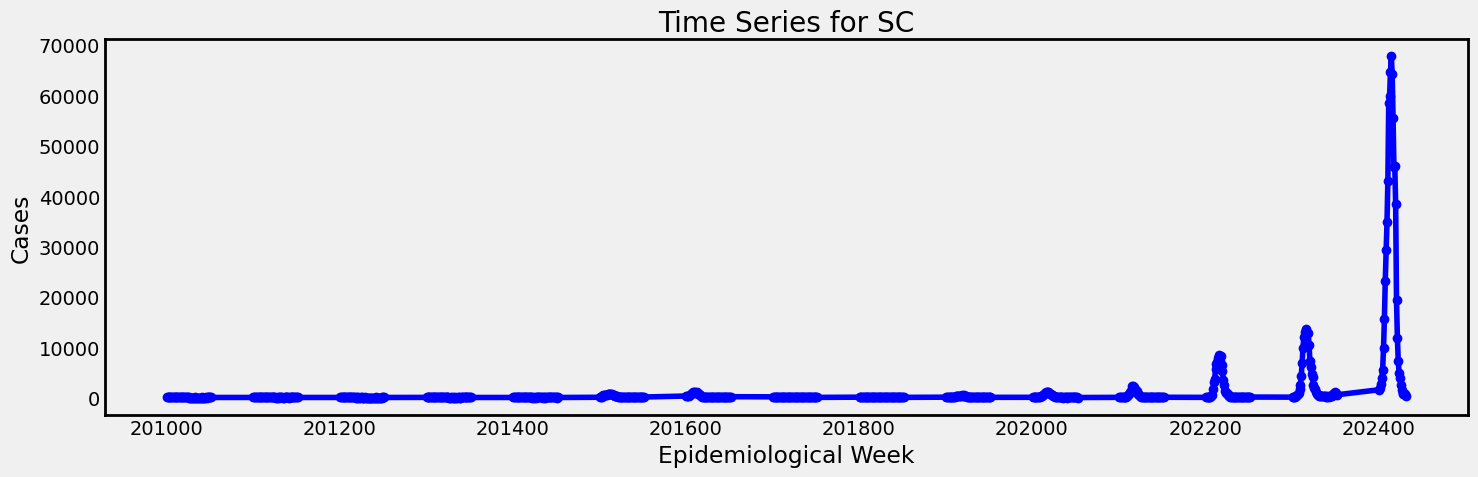

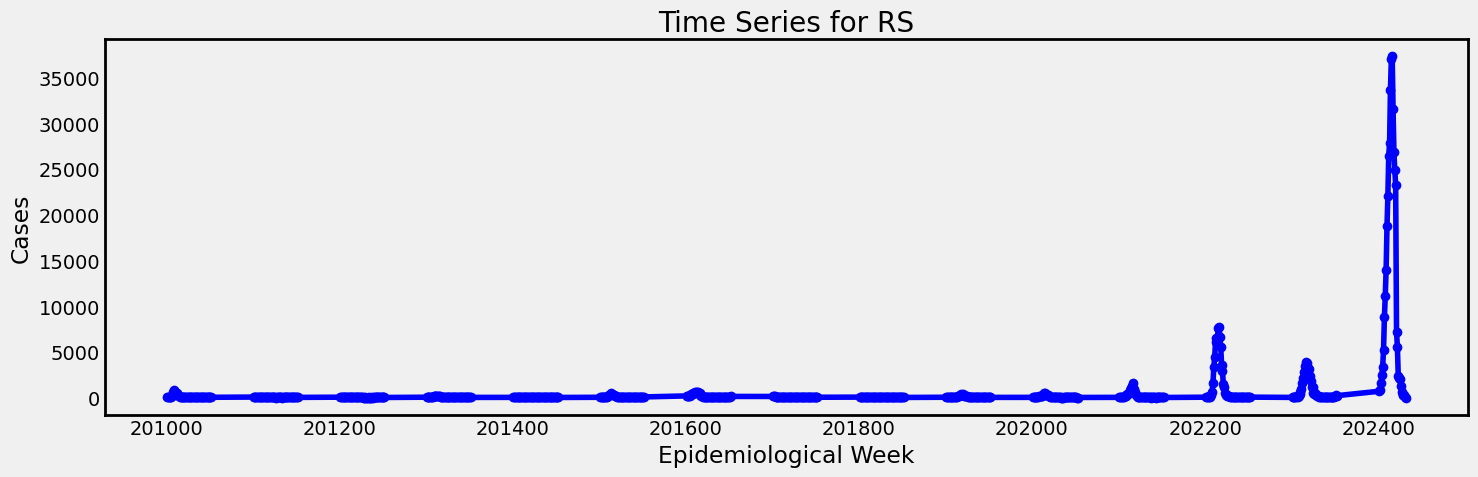

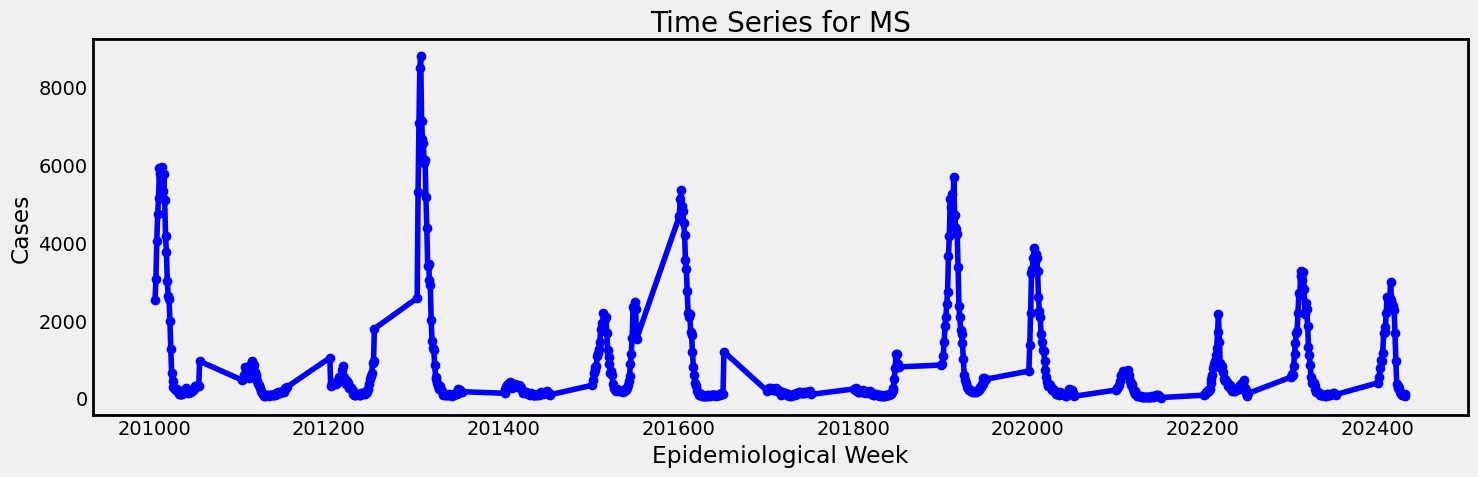

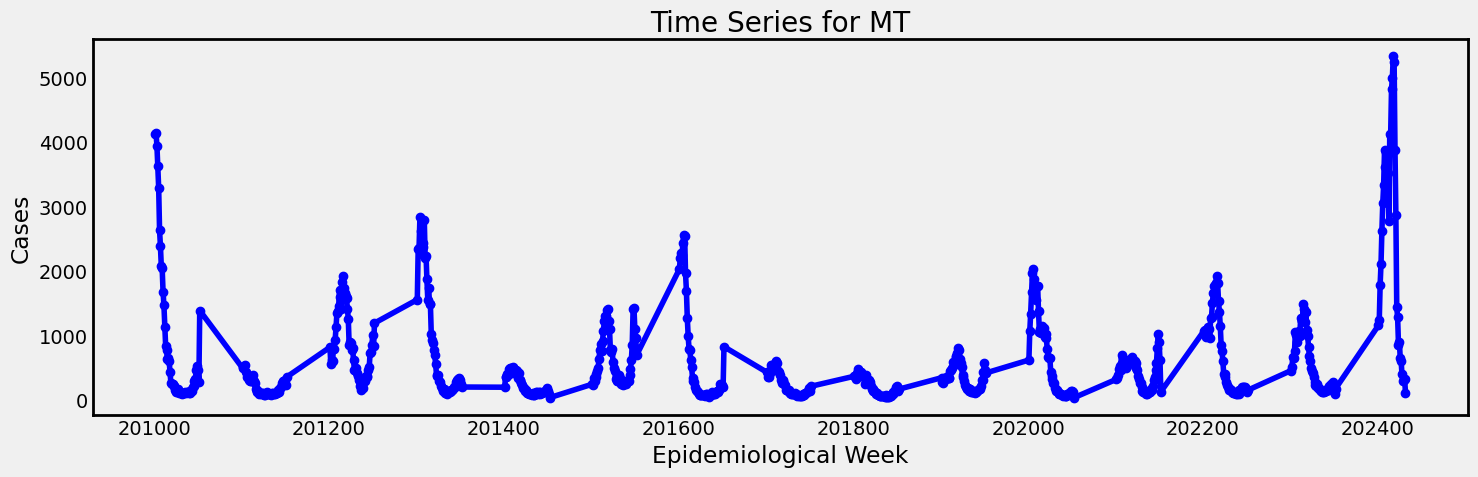

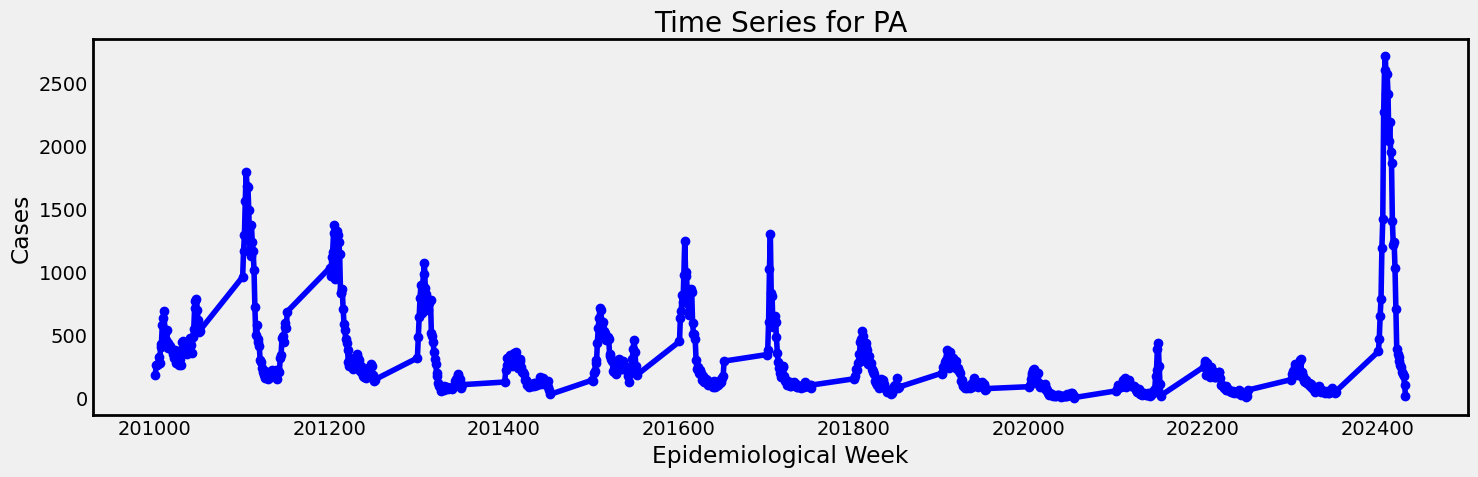

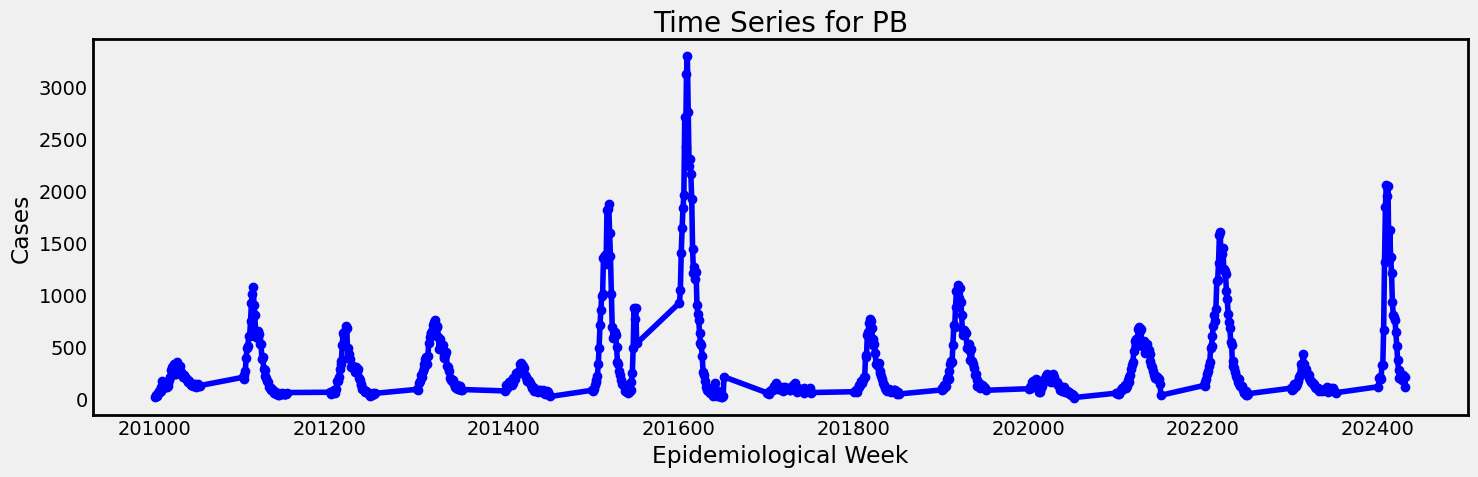

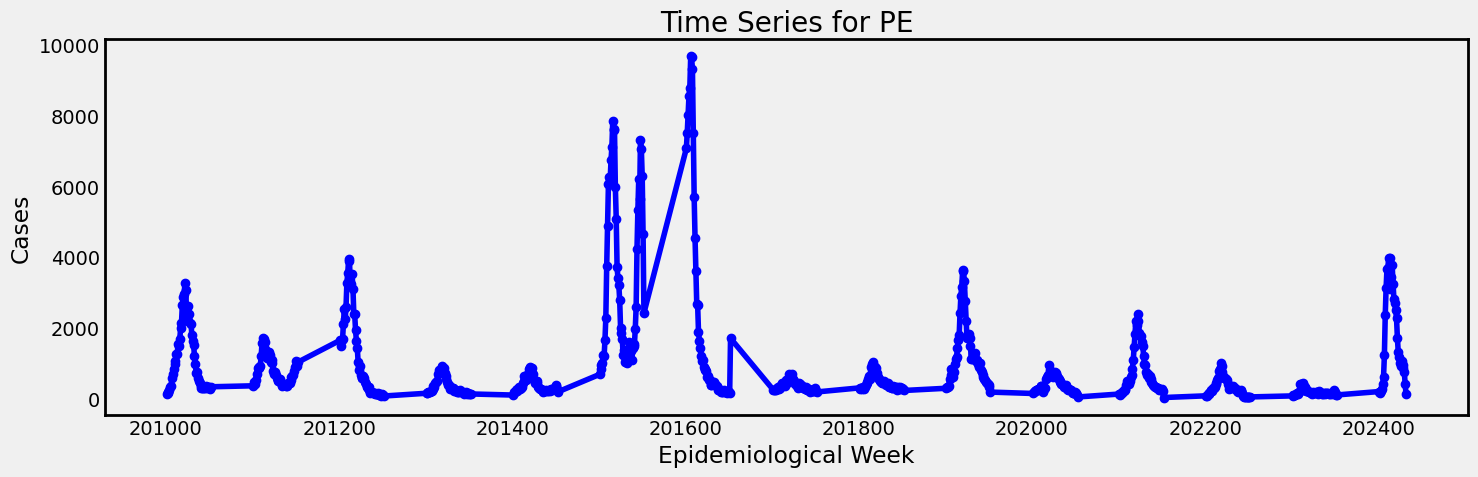

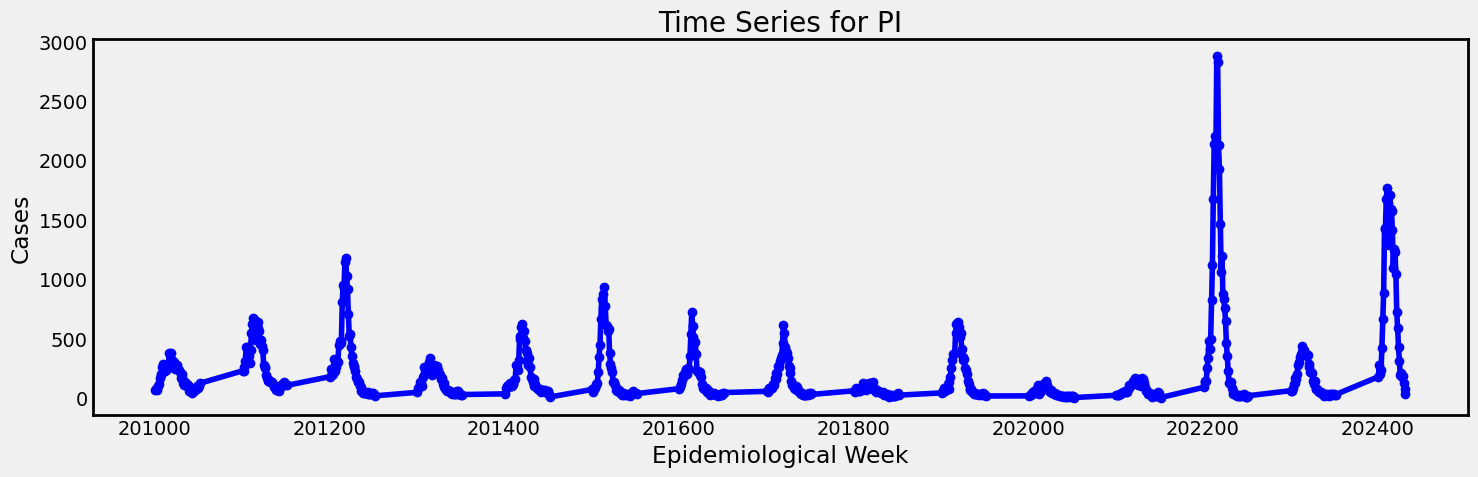

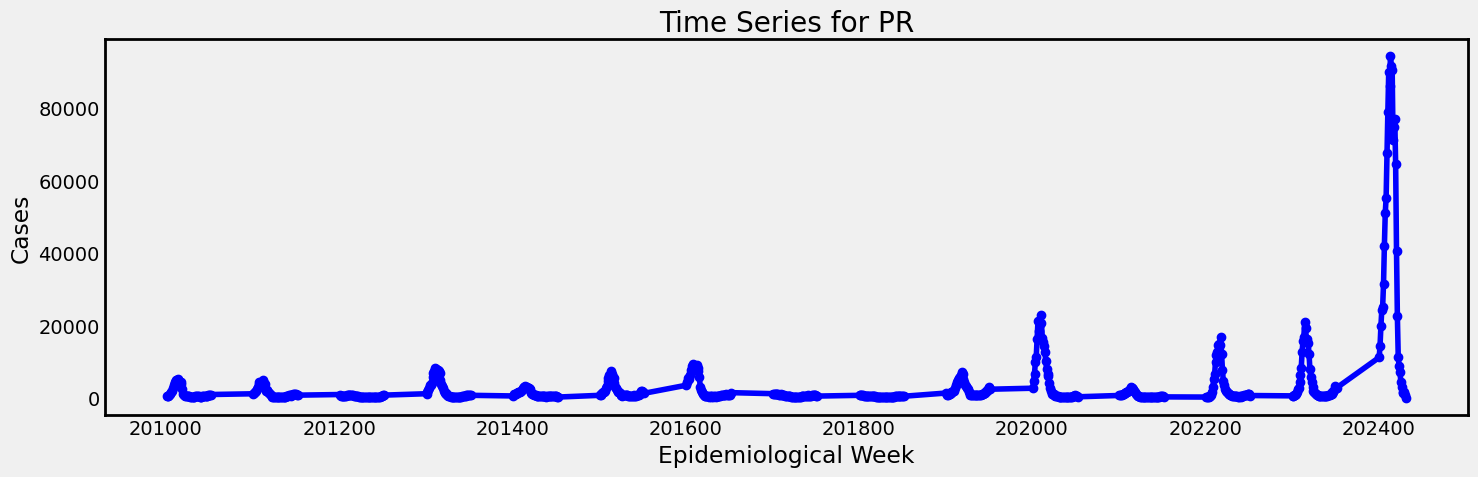

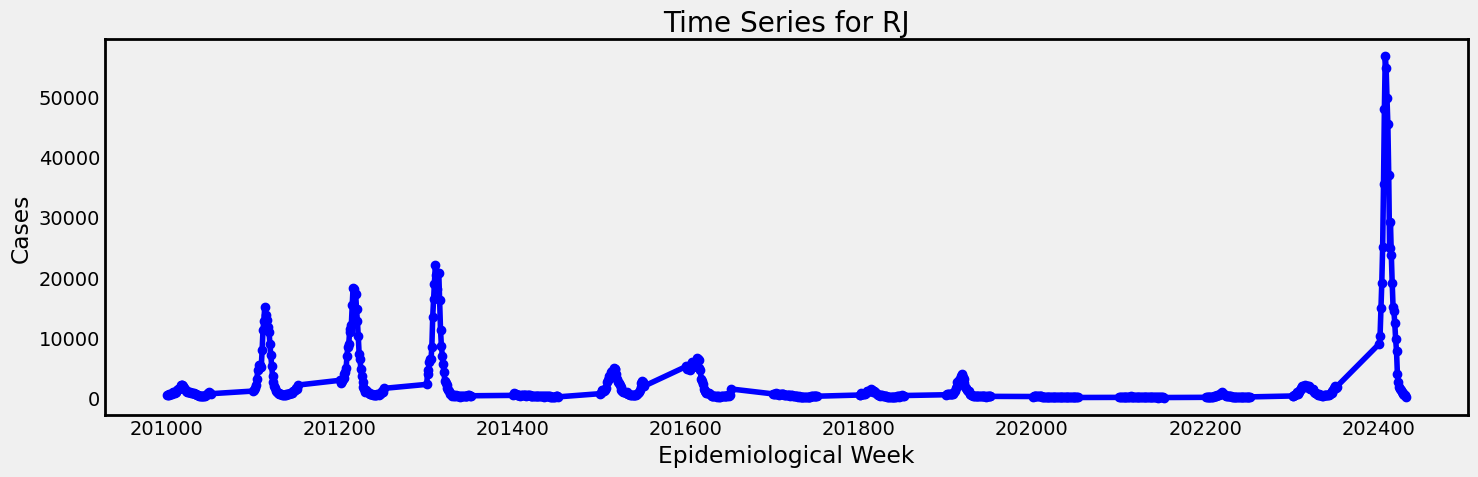

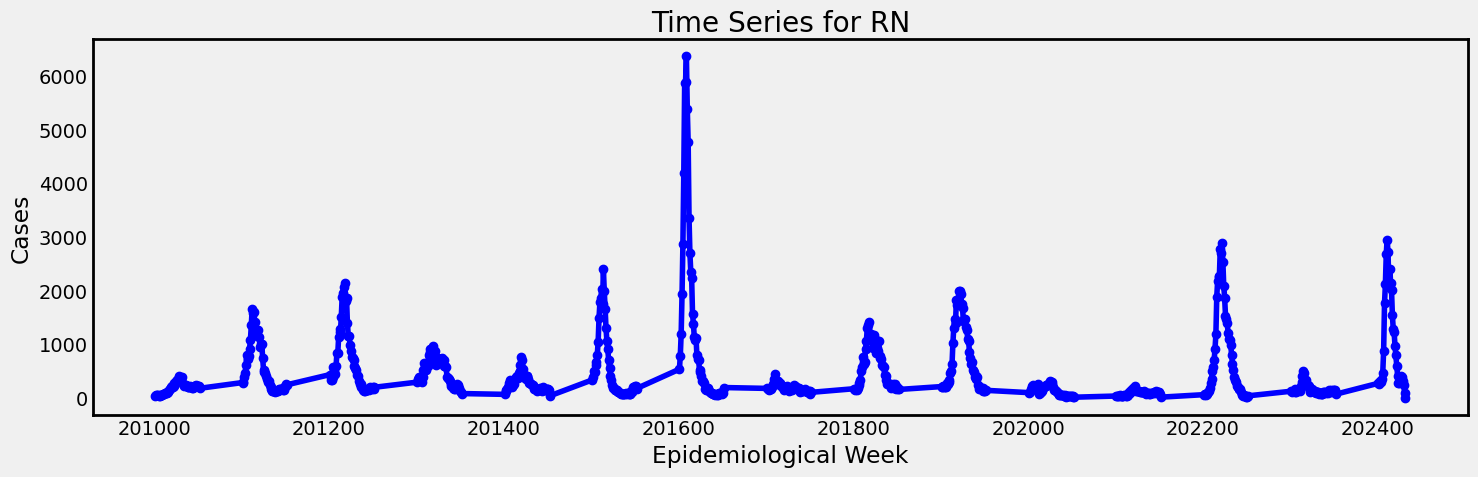

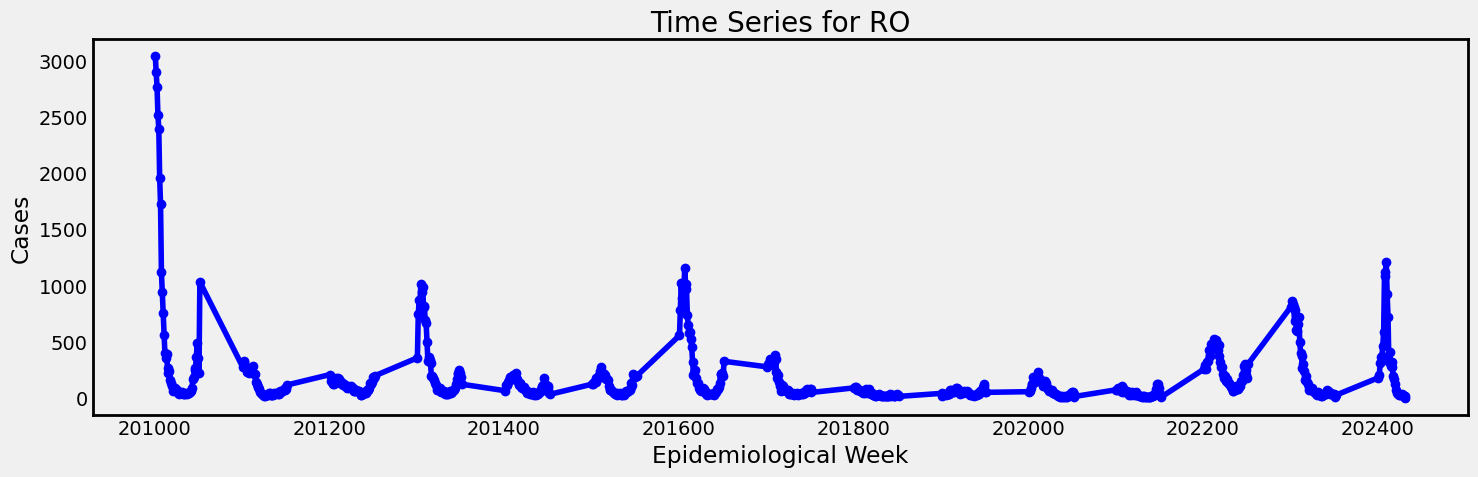

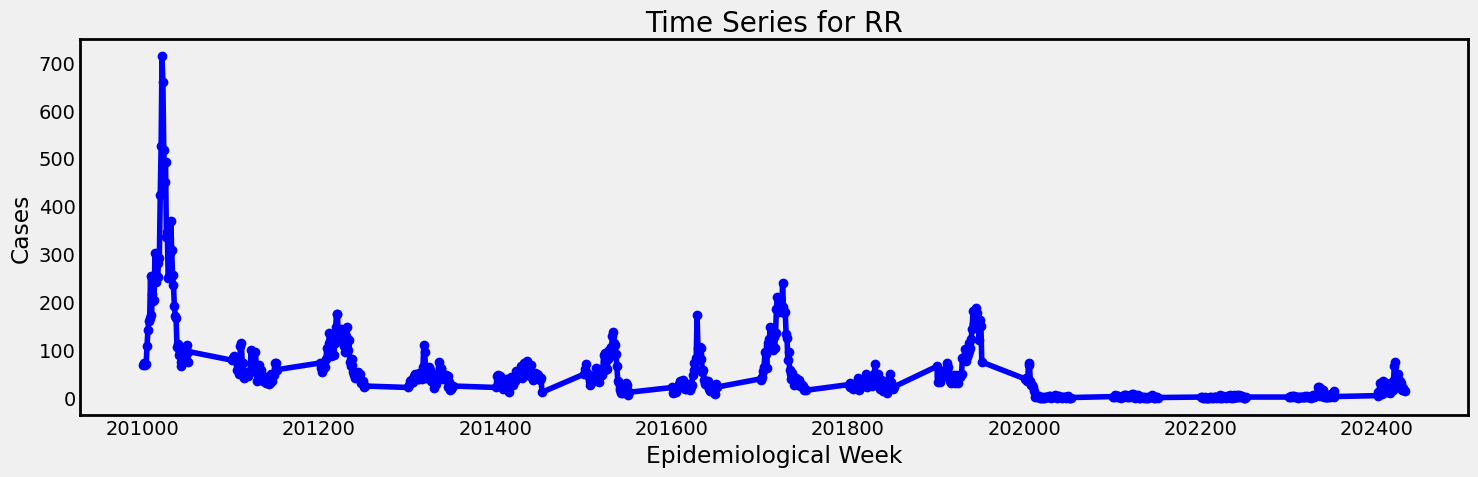

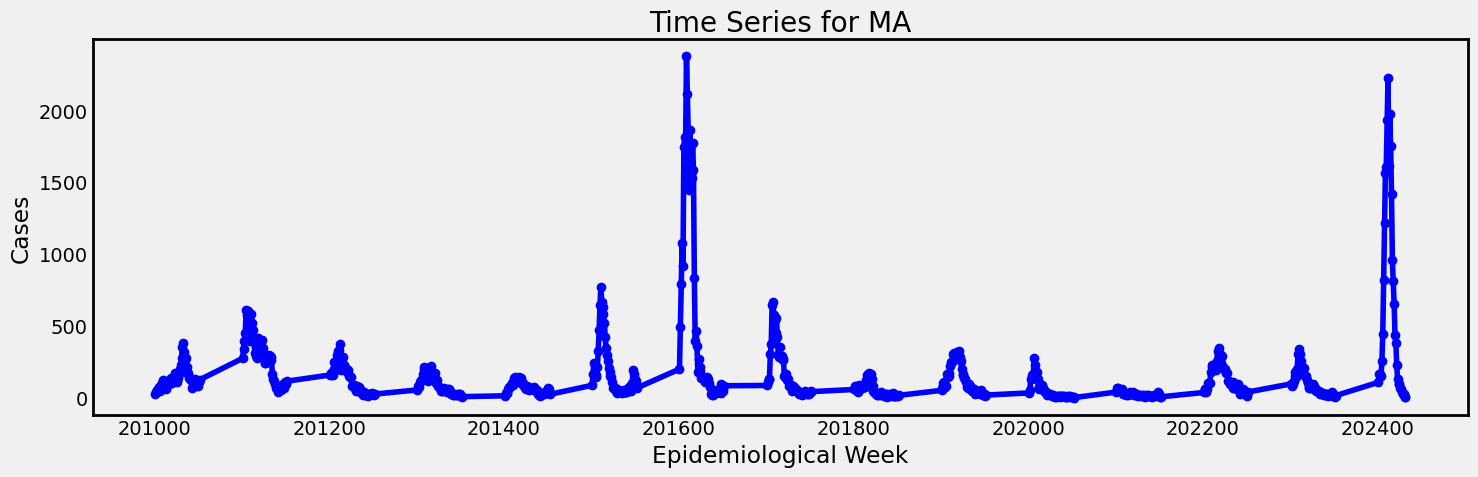

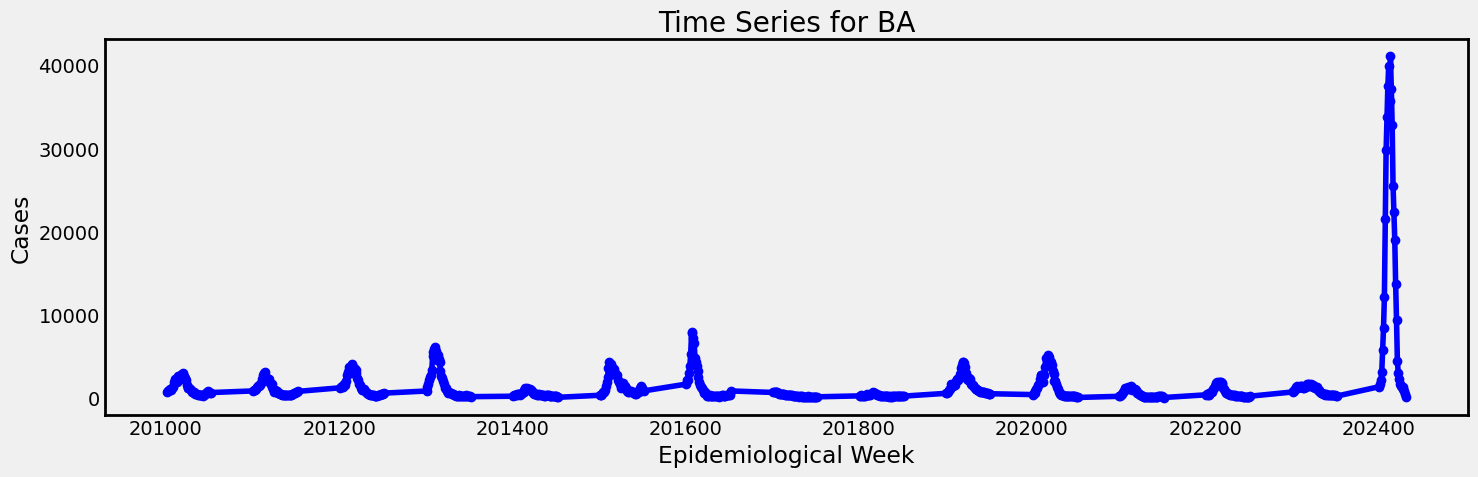

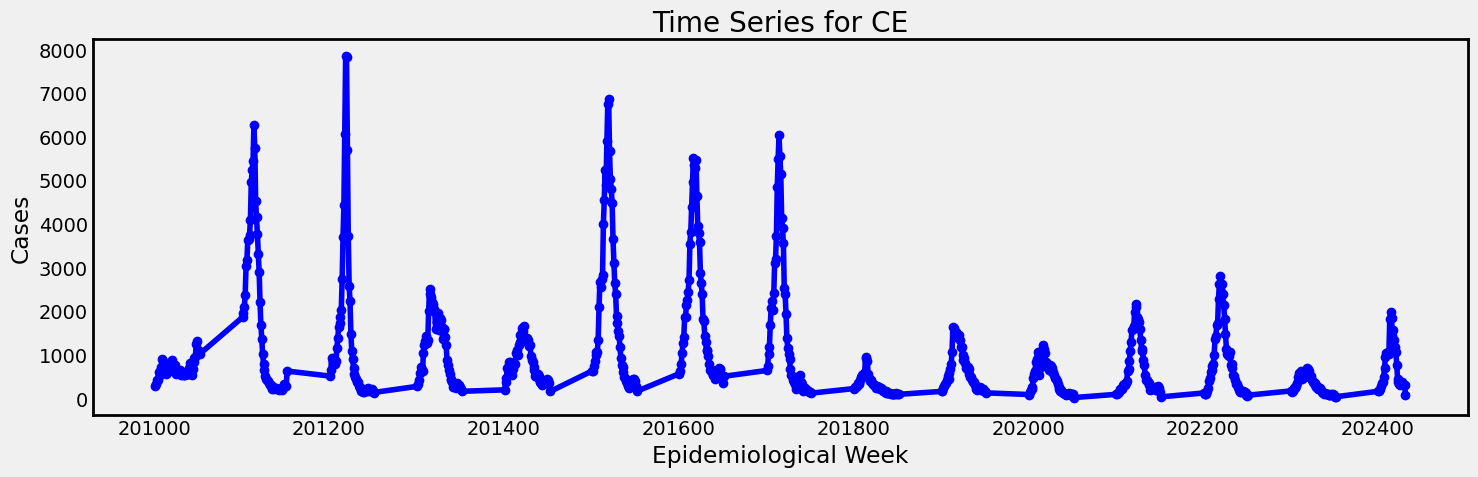

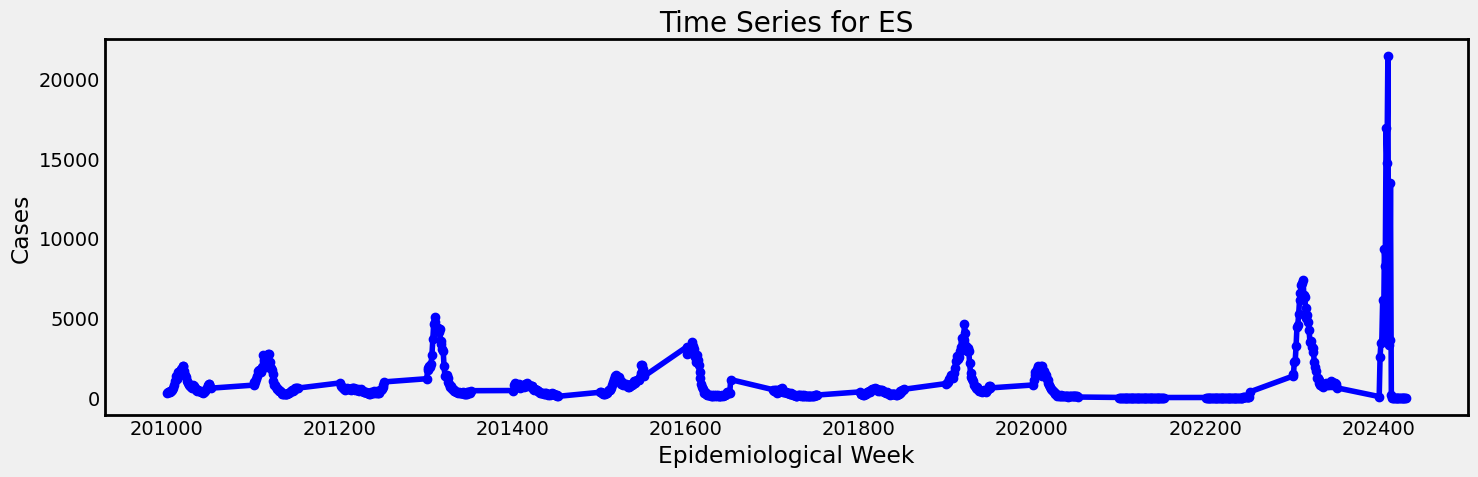

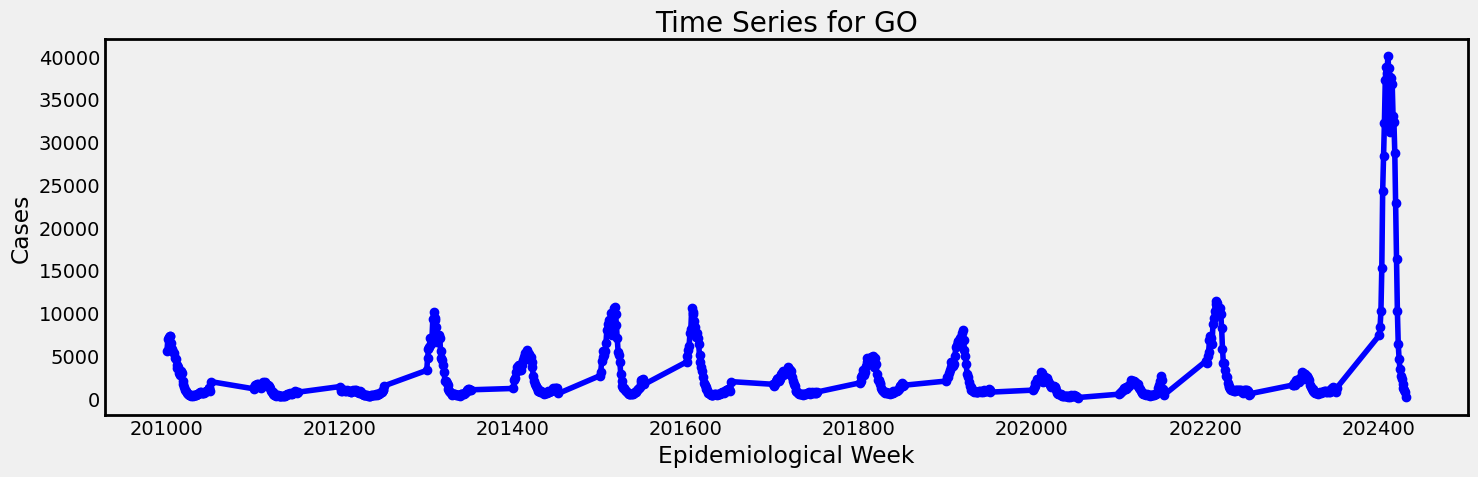

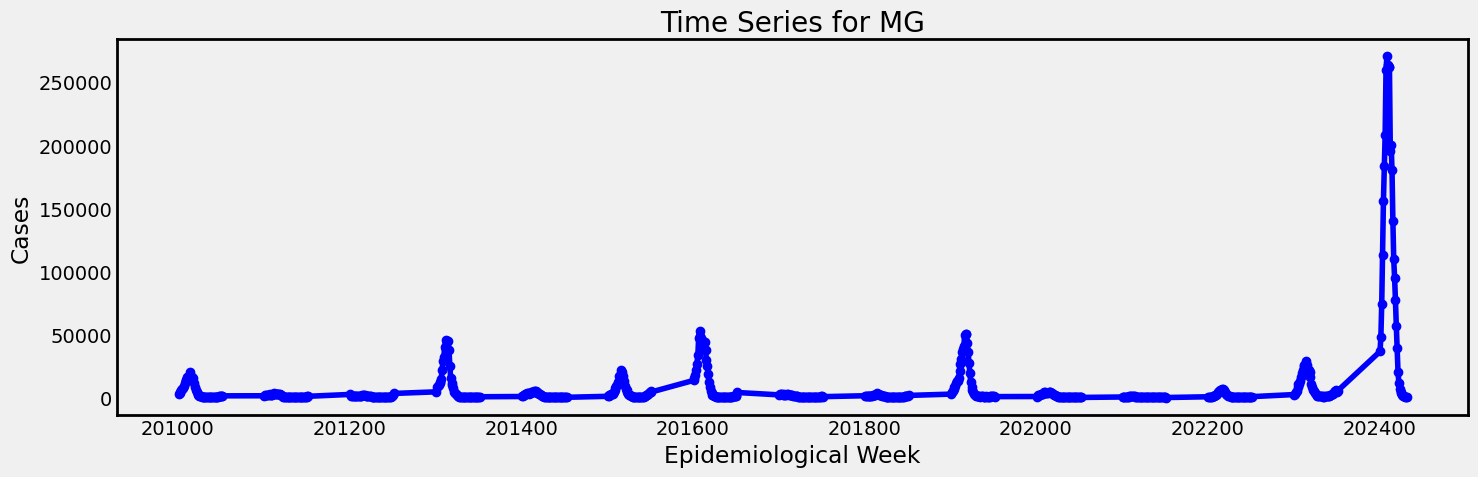

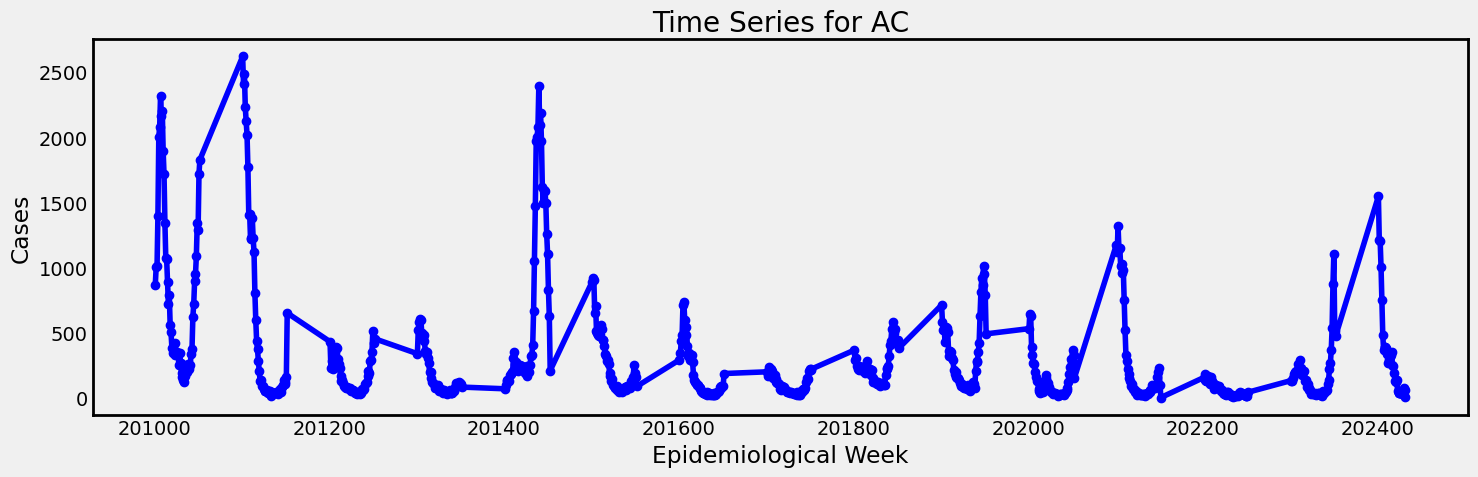

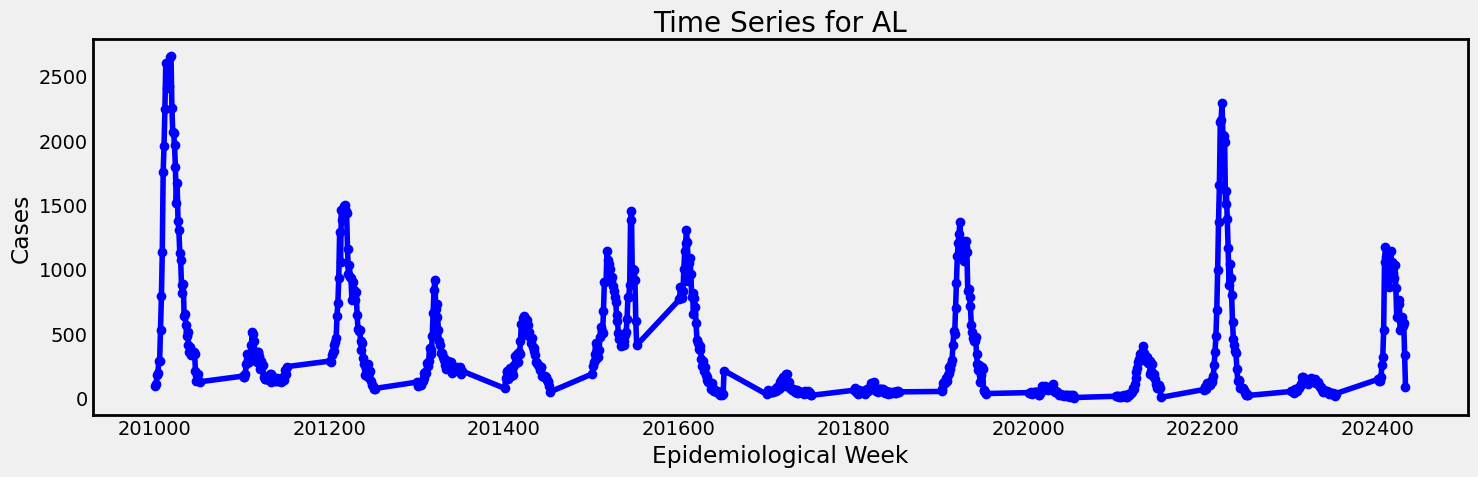

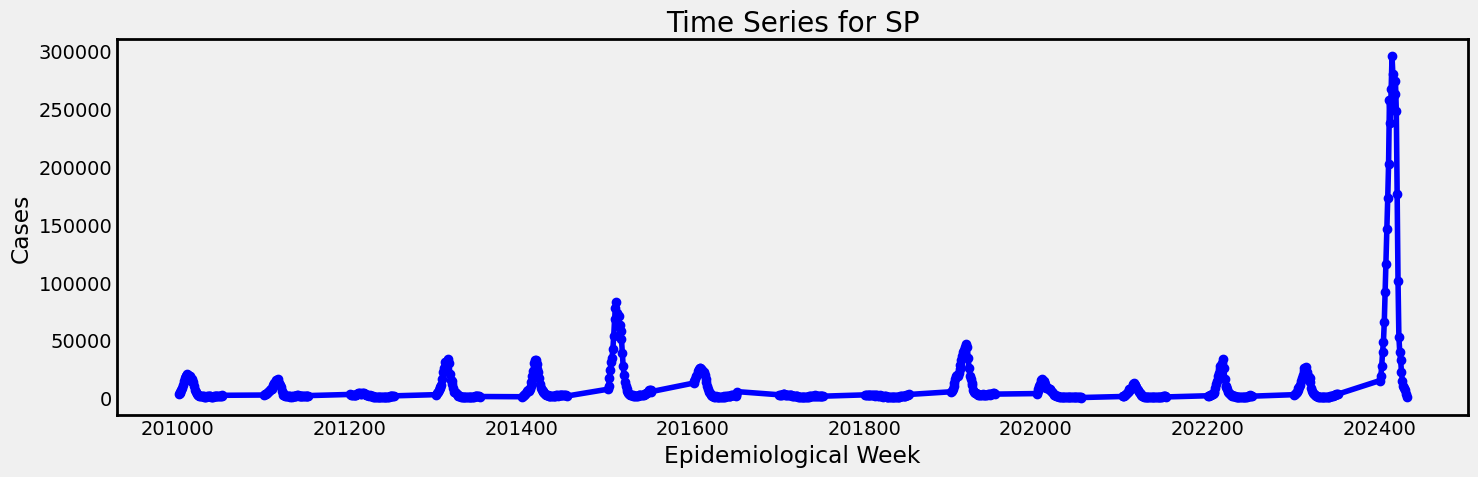

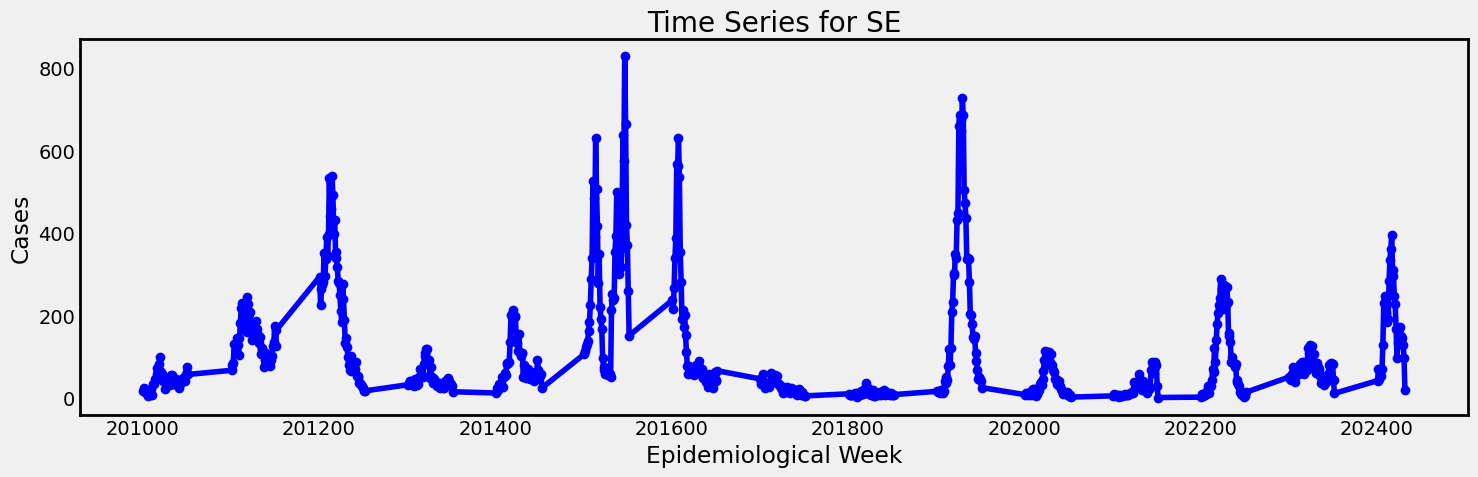

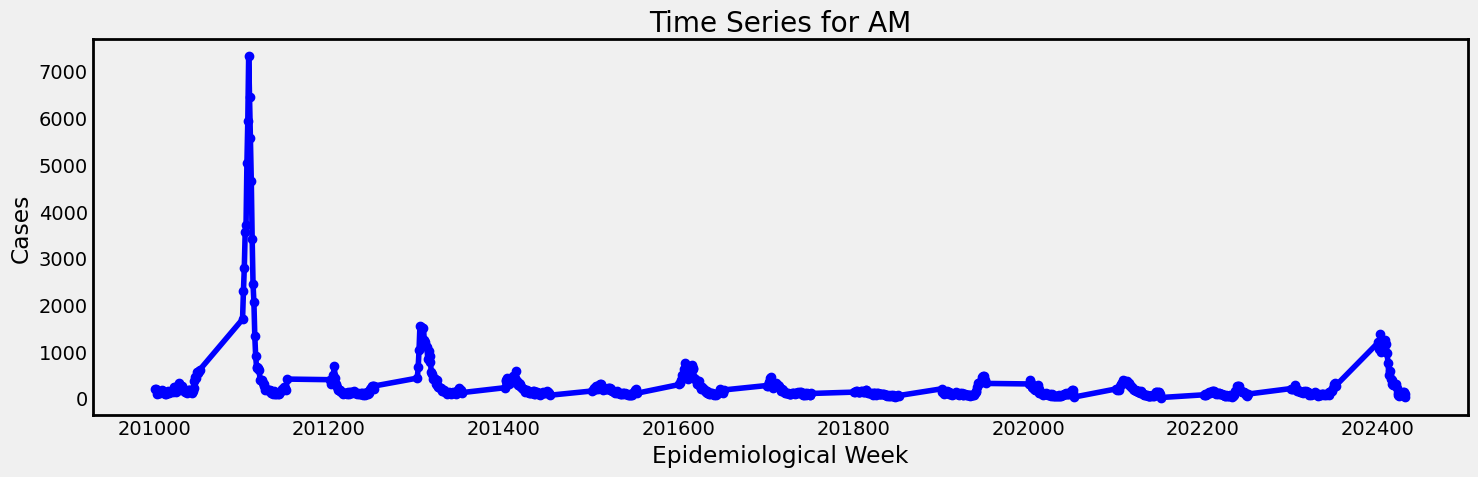

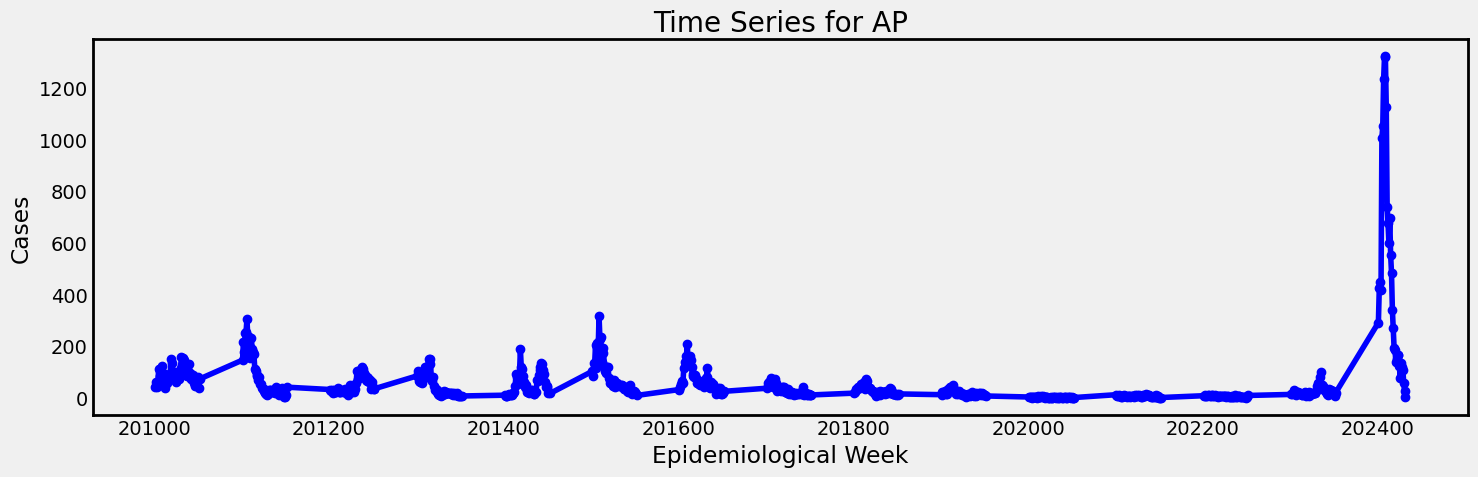

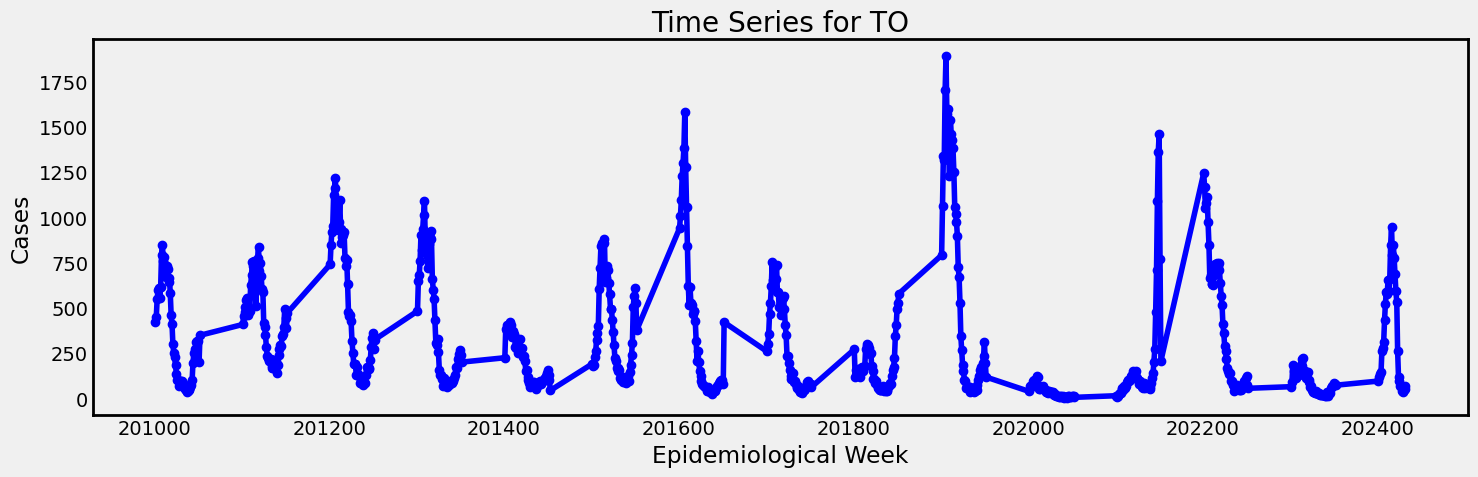

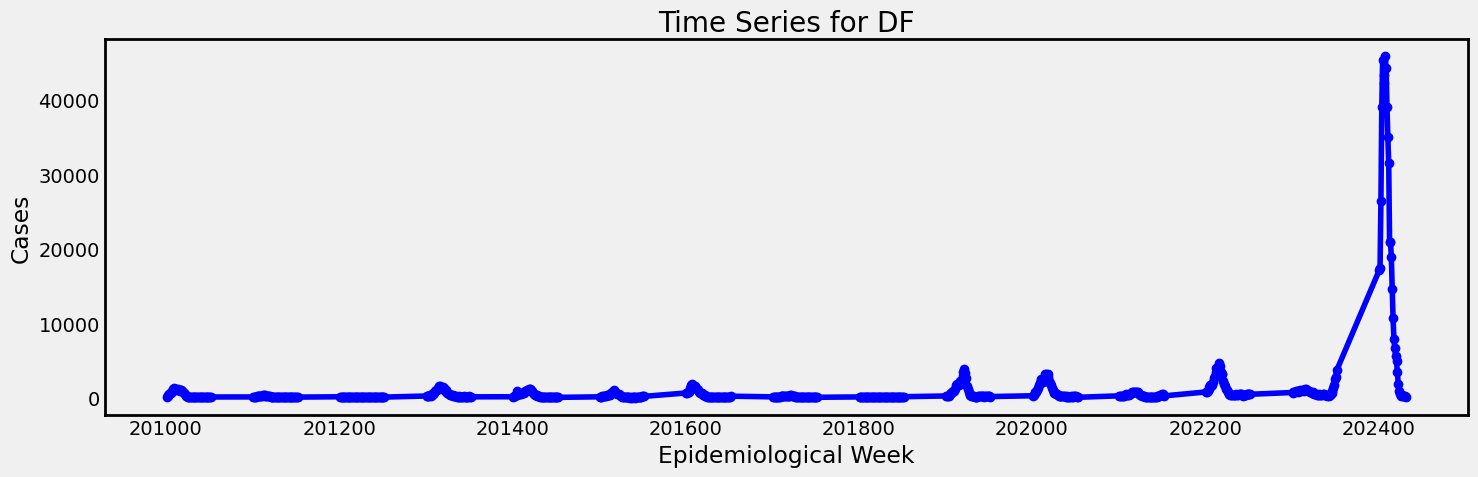

All plots have been saved to /content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengueresults2024/info dengue data and model/png/png


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# List of states to plot
states = ['SC', 'RS', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR',
          'RJ', 'RN', 'RO', 'RR', 'MA', 'BA', 'CE', 'ES', 'GO', 'MG', 'AC', 'AL',
          'SP', 'SE', 'AM', 'AP', 'TO', 'DF']


# Base directory to save the plots
base_dir = '/content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengueresults2024/info dengue data and model/png'

# Directory to save the plots (with 'png' subdirectory)
save_dir = os.path.join(base_dir, 'png')

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Convert the 'date' column to datetime to extract the year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Create time series plots for each state
for state in states:
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df['epiweek'], df[state], marker='o', linestyle='-', color='blue')
    ax.set_title(f'Time Series for {state}')
    ax.set_xlabel('Epidemiological Week')
    ax.set_ylabel('Cases')
    ax.grid(False)

    # Add a black rectangle boundary to the plot
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)

    #plt.xticks(ticks=df['epiweek'], labels=df['date'], rotation=90)
    #plt.xticks(ticks=df['epiweek'], labels=df['year'], rotation=90)
    plt.tight_layout()

    # Save the plot as a PNG file
    save_path = os.path.join(save_dir, f'{state}_time_series.png')
    plt.savefig(save_path)
    plt.show()
    #plt.close()  # Close the plot to free up memory

print(f"All plots have been saved to {save_dir}")


# Final Weekly epidemiological Data and Normalized Data

# Calculate max and min values to convert the forecasting into regular intervals

In [ ]:
# List of states/columns to normalize
# columns_to_normalize = ['SC', 'RS', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR',
#                         'RJ', 'RN', 'RO', 'RR', 'MA', 'BA', 'CE', 'ES', 'GO', 'MG', 'AC', 'AL',
#                         'SP', 'SE', 'AM', 'AP', 'TO', 'DF']
columns_to_normalize = ['GO']
# Initialize a dictionary to store the max values for each column
max_values = {}
min_values= {}

# Normalize each column and store the max value
for col in columns_to_normalize:
    max_value = df[col].max()
    min_value = df[col].min()
    max_values[col] = max_value
    min_values[col] = min_value
    df[f'normalized_{col}'] = (df[col] - min_value) / (max_value - min_value)

# Display the max values
print(max_values)
print(min_values)
# Display the dataframe with normalized columns
print(df.head())

# Combine min and max values into a new DataFrame
min_max_df = pd.DataFrame({'min_values': min_values, 'max_values': max_values})

# Save the min and max values DataFrame to a CSV file
min_max_df.to_csv('min_max_values.csv', index_label='Column')
min_max_df

{'GO': 39960}
{'GO': 77}
   index       date  epiweek  SC  RS    MS    MT   PA  PB   PE  ...    AC  \
0      1 2010-01-03   201001  14  13  2515  4122  177  12  131  ...   869   
1      2 2010-01-10   201002  27  17  3063  4130  257  28  147  ...  1003   
2      3 2010-01-17   201003  23  14  4045  3938  257  26  172  ...  1010   
3      4 2010-01-24   201004  16  13  4733  3629  268  56  225  ...  1397   
4      5 2010-01-31   201005  22  22  5135  3287  324  73  321  ...  2000   

    AL    SP  SE   AM   AP   TO   DF  year  normalized_GO  
0   93  3058  16  191   39  420  147  2010       0.137327  
1  111  3980  22  183   60  450  275  2010       0.171828  
2  176  4869  14   73   39  548  356  2010       0.177971  
3  194  6445  13  100   55  597  461  2010       0.181531  
4  289  8332   8  113  111  607  574  2010       0.180754  

[5 rows x 32 columns]


min_values  max_values
GO          77       39960

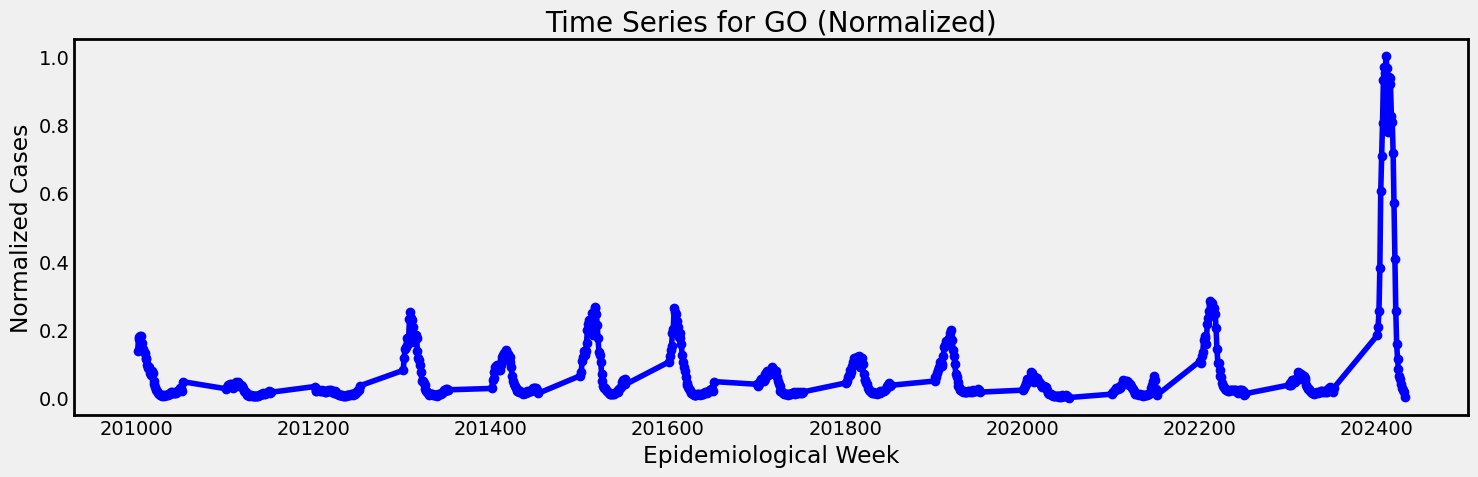

All plots have been saved to /content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengueresults2024/info dengue data and model/png/png


In [ ]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming df is your dataframe

# List of states/columns to normalize
columns_to_normalize = ['GO']

# Normalize each column
for col in columns_to_normalize:
    max_value = df[col].max()
    min_value = df[col].min()
    df[f'normalized_{col}'] = (df[col] - min_value) / (max_value - min_value)

# Base directory to save the plots
base_dir = '/content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengueresults2024/info dengue data and model/png'

# Directory to save the plots (with 'png' subdirectory)
save_dir = os.path.join(base_dir, 'png')

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Convert the 'date' column to datetime to extract the year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Create time series plots for each state
for state in columns_to_normalize:
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df['epiweek'], df[f'normalized_{state}'], marker='o', linestyle='-', color='blue')
    ax.set_title(f'Time Series for {state} (Normalized)')
    ax.set_xlabel('Epidemiological Week')
    ax.set_ylabel('Normalized Cases')
    ax.grid(False)

    # Add a black rectangle boundary to the plot
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)

    #plt.xticks(ticks=df['epiweek'], labels=df['date'], rotation=90)
    #plt.xticks(ticks=df['epiweek'], labels=df['year'], rotation=90)
    plt.tight_layout()

    # Save the plot as a PNG file
    save_path = os.path.join(save_dir, f'{state}_normalized_time_series.png')
    plt.savefig(save_path)
    plt.show()
    #plt.close()  # Close the plot to free up memory

print(f"All plots have been saved to {save_dir}")


# FINAL **CNN-LSTM ensemble using RMSE penalties** model

# Final Training

Shape before reshaping: (25, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 59.62523919645853
Best Test R2 Score: 0.8550765518092347
true_data len 52  with i : 0
[131 119  65  79  82 129  88  81  90  83 106 124 273 341 392 448 608 572
 605 488 390 406 583 520 468 388 309 286 276 315 417 385 336 386 399 346
 306 243 243 278 254 249 299 289 279 263 163 130 112  94  65  64]
X_pred len 52  with i : 0
[[[133.   0.]]

 [[131.   0.]]

 [[119.   0.]]

 [[ 65.   0.]]

 [[ 79.   0.]]

 [[ 82.   0.]]

 [[129.   0.]]

 [[ 88.   0.]]

 [[ 81.   0.]]

 [[ 90.   0.]]

 [[ 83.   0.]]

 [[106.   0.]]

 [[124.   0.]]

 [[273.   0.]]

 [[341.   0.]]

 [[392.   0.]]

 [[448.   0.]]

 [[608.   0.]]

 [[572.   0.]]

 [[605.   0.]]

 [[488.   0.]]

 [[390.   0.]]

 [[406.   0.]]

 [[583.   0.]]

 [[520.   0.]]

 [[468.   0.]]

 [[388.   0.]]

 [[309.   0.]]

 [[286.   0.]]

 [[276.   0.]]

 [[315.   0.]]

 [[417.   0.]]

 [[385.   0.]]

 [[336.   0.]]

 [[386.   0.]]

 [[399.   0.]]

 [[346.   0.]]

 [[306.   0.]]

 [[243.   0.]]

 [[243.   0.]]

 [[278.   0.]]

 [[2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 0
[[135.60065875]
 [133.70391681]
 [122.31036727]
 [ 69.73915623]
 [ 83.75011297]
 [ 86.70210873]
 [131.80675142]
 [ 92.56520246]
 [ 85.71974115]
 [ 94.5089348 ]
 [ 87.68290386]
 [109.91568939]
 [127.06125081]
 [269.78336017]
 [336.06821776]
 [385.99864996]
 [440.92943059]
 [598.09579292]
 [562.72070786]
 [595.14762324]
 [480.20189934]
 [384.0384926 ]
 [399.72367168]
 [573.52936709]
 [511.63235569]
 [460.5630116 ]
 [382.07841677]
 [304.82029501]
 [282.4182811 ]
 [272.69717795]
 [310.67294127]
 [410.51166528]
 [379.1386288 ]
 [331.18070468]
 [380.11851404]
 [392.86039196]
 [340.95741074]
 [301.89519859]
 [240.71890642]
 [240.71890642]
 [274.6403848 ]
 [251.35925721]
 [246.52017132]
 [295.07340761]
 [285.33702554]
 [275.61215617]
 [260.0797335 ]
 [164.05909554]
 [132.75540802]
 [115.64576401]
 [ 98.38261704]
 [ 69.73915623]]
residuals for 0 of 52
[  -4.60065875  -14.70391681  -57.31036727    9.26084377   -1.75011297
   42.29789127  -43.80675142  -11.56520

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


new model_forecast len 52   with residual in X_pred i : 0
[[135.94161896]
 [134.17233181]
 [123.02046737]
 [ 71.87730213]
 [ 83.17031983]
 [ 86.67453922]
 [133.10966473]
 [ 97.46871488]
 [ 86.03343261]
 [ 94.16172638]
 [ 87.99640159]
 [109.35546196]
 [126.82479129]
 [291.59123655]
 [338.99041732]
 [390.35669365]
 [445.99865309]
 [602.51729345]
 [573.04278601]
 [604.57152006]
 [488.53213166]
 [392.53280075]
 [406.17408537]
 [582.68407837]
 [520.42298949]
 [468.60493132]
 [388.47813327]
 [312.89610012]
 [287.0177342 ]
 [277.00036925]
 [314.19553589]
 [414.17354861]
 [385.86650337]
 [336.61192704]
 [384.42170109]
 [399.29658122]
 [346.53285363]
 [306.81619656]
 [247.86604557]
 [244.07554123]
 [277.60465922]
 [255.19811997]
 [250.08194144]
 [297.91260206]
 [289.96053715]
 [279.99008855]
 [264.1003742 ]
 [179.72878787]
 [136.13748895]
 [116.81647941]
 [ 99.66387642]
 [ 72.33470508]]
residuals for 0 of 52
[  -4.60065875  -14.70391681  -57.31036727    9.26084377   -1.75011297
   42.29789127  

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 33.84554812750985
Best Test R2 Score: 0.8546394155441488
true_data len 52  with i : 1
[ 57  35  61  73  49  80  91  69  92 105  91 114 157 171 159 156 200 248
 194 237 299 326 328 373 280 194 240 279 223 211 185 194 169 194 147 146
 140  80  90  82  86  64  44  79  62  70  40  54  47  37  21  36]
X_pred len 52  with i : 1
[[[ 64.   0.]]

 [[ 57.   0.]]

 [[ 35.   0.]]

 [[ 61.   0.]]

 [[ 73.   0.]]

 [[ 49.   0.]]

 [[ 80.   0.]]

 [[ 91.   0.]]

 [[ 69.   0.]]

 [[ 92.   0.]]

 [[105.   0.]]

 [[ 91.   0.]]

 [[114.   0.]]

 [[157.   0.]]

 [[171.   0.]]

 [[159.   0.]]

 [[156.   0.]]

 [[200.   0.]]

 [[248.   0.]]

 [[194.   0.]]

 [[237.   0.]]

 [[299.   0.]]

 [[326.   0.]]

 [[328.   0.]]

 [[373.   0.]]

 [[280.   0.]]

 [[194.   0.]]

 [[240.   0.]]

 [[279.   0.]]

 [[223.   0.]]

 [[211.   0.]]

 [[185.   0.]]

 [[194.   0.]]

 [[169.   0.]]

 [[194.   0.]]

 [[147.   0.]]

 [[146.   0.]]

 [[140.   0.]]

 [[ 80.   0.]]

 [[ 90.   0.]]

 [[ 82.   0.]]

 [[ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 1
[[ 66.44563833]
 [ 58.87201363]
 [ 34.37792304]
 [ 63.21209131]
 [ 76.04774193]
 [ 50.08600043]
 [ 83.4300434 ]
 [ 94.91780183]
 [ 71.79717551]
 [ 95.95680485]
 [109.40815512]
 [ 94.91780183]
 [118.68035042]
 [162.92198091]
 [177.37166414]
 [164.98422864]
 [161.89109583]
 [207.4045606 ]
 [257.32903323]
 [201.18048833]
 [245.87339146]
 [310.46027276]
 [338.56082721]
 [340.64091186]
 [387.37745283]
 [290.66917981]
 [201.18048833]
 [248.99711112]
 [289.62731217]
 [231.30328763]
 [218.82726921]
 [191.85405531]
 [201.18048833]
 [175.30541839]
 [201.18048833]
 [152.61988493]
 [151.59044053]
 [145.41640943]
 [ 83.4300434 ]
 [ 93.87803022]
 [ 85.52788688]
 [ 89.71055729]
 [ 66.44563833]
 [ 44.52099284]
 [ 82.37936185]
 [ 64.2919275 ]
 [ 72.86224068]
 [ 40.03051072]
 [ 55.59421179]
 [ 47.86672043]
 [ 36.64333359]
 [ 18.55428877]]
residuals for 1 of 52
[  -9.44563833  -23.87201363   26.62207696    9.78790869  -27.04774193
   29.91399957    7.5699566   -25.91780

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


new model_forecast len 52   with residual in X_pred i : 1
[[ 68.36141054]
 [ 56.92358585]
 [ 35.79945493]
 [ 69.2531841 ]
 [ 81.2723744 ]
 [ 48.38244023]
 [ 88.11837552]
 [ 99.57079268]
 [ 67.00804275]
 [100.66017686]
 [114.45904636]
 [ 89.20983608]
 [125.25071089]
 [164.1944647 ]
 [180.72233556]
 [153.85482435]
 [156.78394105]
 [214.35029755]
 [267.36819391]
 [182.8431015 ]
 [255.98717296]
 [321.21590569]
 [342.0341384 ]
 [331.90660191]
 [395.73832   ]
 [258.44656056]
 [185.25329237]
 [258.9065074 ]
 [298.35717088]
 [209.14636742]
 [202.8244586 ]
 [172.07633876]
 [201.33950408]
 [158.32120962]
 [207.97360273]
 [140.20467242]
 [148.33929258]
 [139.38550422]
 [ 90.92094936]
 [ 98.17230956]
 [ 82.07469526]
 [ 91.57530494]
 [ 62.18596073]
 [ 42.59263446]
 [ 89.77474991]
 [ 60.22767831]
 [ 76.91113398]
 [ 44.30625275]
 [ 59.30959147]
 [ 46.38123529]
 [ 35.12573421]
 [ 20.83652402]]
residuals for 1 of 52
[  -9.44563833  -23.87201363   26.62207696    9.78790869  -27.04774193
   29.91399957  

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 23.745002586496177
Best Test R2 Score: 0.8561901051042842
true_data len 52  with i : 2
[ 21  19  23  24  10  17  23  25  32  23  20  24  53  82  71 108 120 125
 163 195 211 182 138 125 115 191 215 220 178 163 150 173 170  98  94 122
  83  73  63  43  48  53  43  64  61  53  41  58  61  42  22  30]
X_pred len 52  with i : 2
[[[ 36.   0.]]

 [[ 21.   0.]]

 [[ 19.   0.]]

 [[ 23.   0.]]

 [[ 24.   0.]]

 [[ 10.   0.]]

 [[ 17.   0.]]

 [[ 23.   0.]]

 [[ 25.   0.]]

 [[ 32.   0.]]

 [[ 23.   0.]]

 [[ 20.   0.]]

 [[ 24.   0.]]

 [[ 53.   0.]]

 [[ 82.   0.]]

 [[ 71.   0.]]

 [[108.   0.]]

 [[120.   0.]]

 [[125.   0.]]

 [[163.   0.]]

 [[195.   0.]]

 [[211.   0.]]

 [[182.   0.]]

 [[138.   0.]]

 [[125.   0.]]

 [[115.   0.]]

 [[191.   0.]]

 [[215.   0.]]

 [[220.   0.]]

 [[178.   0.]]

 [[163.   0.]]

 [[150.   0.]]

 [[173.   0.]]

 [[170.   0.]]

 [[ 98.   0.]]

 [[ 94.   0.]]

 [[122.   0.]]

 [[ 83.   0.]]

 [[ 73.   0.]]

 [[ 63.   0.]]

 [[ 43.   0.]]

 [[

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 2
[[ 38.10420047]
 [ 21.00710172]
 [ 18.73227887]
 [ 23.28734061]
 [ 24.42870007]
 [  8.72408887]
 [ 16.46631951]
 [ 23.28734061]
 [ 25.57053709]
 [ 33.55880239]
 [ 23.28734061]
 [ 19.86883227]
 [ 24.42870007]
 [ 57.07917428]
 [ 87.97672186]
 [ 76.45336412]
 [114.5325188 ]
 [126.55256517]
 [131.52662505]
 [168.80701395]
 [199.64043336]
 [214.90711662]
 [187.16642243]
 [144.37718968]
 [131.52662505]
 [121.55905754]
 [195.80930718]
 [218.71024417]
 [223.45710301]
 [183.31453142]
 [168.80701395]
 [156.14599276]
 [178.48996442]
 [175.58993475]
 [104.4130788 ]
 [100.33484523]
 [128.54443868]
 [ 89.01436649]
 [ 78.5643902 ]
 [ 67.93002713]
 [ 45.9938105 ]
 [ 51.56572993]
 [ 57.07917428]
 [ 45.9938105 ]
 [ 69.00272428]
 [ 65.77808119]
 [ 57.07917428]
 [ 43.74950376]
 [ 62.53336721]
 [ 65.77808119]
 [ 44.87271449]
 [ 22.14671409]]
residuals for 2 of 52
[-17.10420047  -2.00710172   4.26772113   0.71265939 -14.42870007
   8.27591113   6.53368049   1.71265939   6.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


new model_forecast len 52   with residual in X_pred i : 2
[[ 40.50979716]
 [ 27.85502772]
 [ 20.20741311]
 [ 25.94338881]
 [ 26.66329626]
 [ 15.99745254]
 [ 19.13325145]
 [ 25.81756748]
 [ 28.06892795]
 [ 36.91605756]
 [ 26.16907274]
 [ 21.26893608]
 [ 27.18341792]
 [ 64.44180454]
 [ 90.28640351]
 [ 74.57253191]
 [115.93412457]
 [128.52463495]
 [130.13245565]
 [177.89282958]
 [212.21035556]
 [218.94053733]
 [175.7735289 ]
 [137.86782915]
 [123.94298666]
 [114.95509115]
 [198.91357615]
 [227.30184888]
 [222.7477532 ]
 [175.96046462]
 [158.90805276]
 [147.08830006]
 [185.92859915]
 [170.28354622]
 [107.89797488]
 [ 96.40048962]
 [135.87445449]
 [ 84.68800704]
 [ 76.33300113]
 [ 66.91958665]
 [ 49.44021954]
 [ 54.44485357]
 [ 59.64573973]
 [ 47.40899824]
 [ 72.37339864]
 [ 64.88985155]
 [ 57.07635225]
 [ 45.64347051]
 [ 66.51031256]
 [ 66.91226704]
 [ 48.20459683]
 [ 32.3607842 ]]
residuals for 2 of 52
[-17.10420047  -2.00710172   4.26772113   0.71265939 -14.42870007
   8.27591113   6.533

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 14.778114315104348
Best Test R2 Score: 0.8646834449674331
true_data len 52  with i : 3
[ 26  17  20  23  20  18  17  22  28  25  12   6  12  34  32  32  62  75
  71  89  98  87 106 139 141 128 127 116 141 118 139 137  97  99  83  63
  57  81  67  70  53  57  68  62  67  71  49  49  44  50  26  20]
X_pred len 52  with i : 3
[[[ 30.   0.]]

 [[ 26.   0.]]

 [[ 17.   0.]]

 [[ 20.   0.]]

 [[ 23.   0.]]

 [[ 20.   0.]]

 [[ 18.   0.]]

 [[ 17.   0.]]

 [[ 22.   0.]]

 [[ 28.   0.]]

 [[ 25.   0.]]

 [[ 12.   0.]]

 [[  6.   0.]]

 [[ 12.   0.]]

 [[ 34.   0.]]

 [[ 32.   0.]]

 [[ 32.   0.]]

 [[ 62.   0.]]

 [[ 75.   0.]]

 [[ 71.   0.]]

 [[ 89.   0.]]

 [[ 98.   0.]]

 [[ 87.   0.]]

 [[106.   0.]]

 [[139.   0.]]

 [[141.   0.]]

 [[128.   0.]]

 [[127.   0.]]

 [[116.   0.]]

 [[141.   0.]]

 [[118.   0.]]

 [[139.   0.]]

 [[137.   0.]]

 [[ 97.   0.]]

 [[ 99.   0.]]

 [[ 83.   0.]]

 [[ 63.   0.]]

 [[ 57.   0.]]

 [[ 81.   0.]]

 [[ 67.   0.]]

 [[ 70.   0.]]

 [[

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 3
[[ 33.09878812]
 [ 28.58203633]
 [ 18.23419856]
 [ 21.70787292]
 [ 25.15889301]
 [ 21.70787292]
 [ 19.39406366]
 [ 18.23419856]
 [ 24.01147806]
 [ 30.84738254]
 [ 27.44427098]
 [ 12.43528411]
 [  5.77367995]
 [ 12.43528411]
 [ 37.5584551 ]
 [ 35.33591224]
 [ 35.33591224]
 [ 67.13592258]
 [ 80.03611028]
 [ 76.10988893]
 [ 93.54793773]
 [102.09588923]
 [ 91.63593451]
 [109.63532041]
 [140.48633778]
 [142.3530503 ]
 [130.22093033]
 [129.28750799]
 [119.00995905]
 [142.3530503 ]
 [120.8805002 ]
 [140.48633778]
 [138.61983579]
 [101.15004842]
 [103.04088936]
 [ 87.79543848]
 [ 68.14366908]
 [ 62.05268907]
 [ 85.86609076]
 [ 72.1471705 ]
 [ 75.12280671]
 [ 57.92901579]
 [ 62.05268907]
 [ 73.14151377]
 [ 67.13592258]
 [ 72.1471705 ]
 [ 76.10988893]
 [ 53.75074488]
 [ 53.75074488]
 [ 48.44686835]
 [ 54.80060048]
 [ 28.58203633]]
residuals for 3 of 52
[ -7.09878812 -11.58203633   1.76580144   1.29212708  -5.15889301
  -3.70787292  -2.39406366   3.76580144   3.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


new model_forecast len 52   with residual in X_pred i : 3
[[ 33.25401848]
 [ 28.84609506]
 [ 20.49499067]
 [ 22.25945928]
 [ 25.61374432]
 [ 22.09781882]
 [ 19.70050233]
 [ 18.49338925]
 [ 24.62503087]
 [ 31.50368782]
 [ 27.62536213]
 [ 17.37041299]
 [  7.1585526 ]
 [ 12.92085329]
 [ 39.34138374]
 [ 35.03389552]
 [ 35.03376441]
 [ 69.31640419]
 [ 81.74450575]
 [ 74.10417401]
 [ 96.51301223]
 [103.76938165]
 [ 88.94601005]
 [113.65979463]
 [145.76068269]
 [144.19149452]
 [126.79728039]
 [129.67319628]
 [115.9237199 ]
 [148.18821801]
 [116.90415046]
 [146.22812796]
 [139.13684692]
 [ 96.45099235]
 [103.0925067 ]
 [ 85.21378179]
 [ 66.42628894]
 [ 60.36223668]
 [ 87.89681489]
 [ 70.34254444]
 [ 74.5380518 ]
 [ 56.86097232]
 [ 61.65443076]
 [ 74.27017122]
 [ 65.26424156]
 [ 72.011194  ]
 [ 75.80644858]
 [ 53.67269312]
 [ 52.68401603]
 [ 47.51227636]
 [ 54.85442305]
 [ 37.20132136]]
residuals for 3 of 52
[ -7.09878812 -11.58203633   1.76580144   1.29212708  -5.15889301
  -3.70787292  -2.394

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 54.44916602550302
Best Test R2 Score: 0.924667710926767
true_data len 53  with i : 4
[ 12  31  15  24  33  26  30  29  52  65  61  58  23  85 167 242 153 144
 159 212 323 468 645 767 667 632 582 518 419 344 294 251 206 175 150 140
 105  69  75  63  42  59  33  51  39  43  42  33  41  38  53  39  36]
X_pred len 53  with i : 4
[[[ 20.   0.]]

 [[ 12.   0.]]

 [[ 31.   0.]]

 [[ 15.   0.]]

 [[ 24.   0.]]

 [[ 33.   0.]]

 [[ 26.   0.]]

 [[ 30.   0.]]

 [[ 29.   0.]]

 [[ 52.   0.]]

 [[ 65.   0.]]

 [[ 61.   0.]]

 [[ 58.   0.]]

 [[ 23.   0.]]

 [[ 85.   0.]]

 [[167.   0.]]

 [[242.   0.]]

 [[153.   0.]]

 [[144.   0.]]

 [[159.   0.]]

 [[212.   0.]]

 [[323.   0.]]

 [[468.   0.]]

 [[645.   0.]]

 [[767.   0.]]

 [[667.   0.]]

 [[632.   0.]]

 [[582.   0.]]

 [[518.   0.]]

 [[419.   0.]]

 [[344.   0.]]

 [[294.   0.]]

 [[251.   0.]]

 [[206.   0.]]

 [[175.   0.]]

 [[150.   0.]]

 [[140.   0.]]

 [[105.   0.]]

 [[ 69.   0.]]

 [[ 75.   0.]]

 [[ 63.   0.]]

 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 53   with i : 4
[[ 20.24921023]
 [ 11.60853246]
 [ 32.09444385]
 [ 14.83526632]
 [ 24.57350527]
 [ 34.23054534]
 [ 26.72910824]
 [ 31.02418099]
 [ 29.95247955]
 [ 54.19219522]
 [ 67.47568226]
 [ 63.42051366]
 [ 60.36071761]
 [ 23.49391279]
 [ 87.38087604]
 [166.30869959]
 [238.77858174]
 [152.88374531]
 [144.26399799]
 [158.63424066]
 [209.67696909]
 [317.85025505]
 [460.03038645]
 [633.669831  ]
 [753.32242953]
 [655.24796323]
 [620.91871098]
 [571.87279899]
 [509.08661715]
 [411.95718027]
 [338.41746981]
 [289.48182607]
 [247.53377098]
 [203.87387585]
 [173.99277223]
 [150.00984832]
 [140.43424718]
 [106.838763  ]
 [ 71.50392236]
 [ 77.49919368]
 [ 65.45155736]
 [ 43.76456228]
 [ 61.38243414]
 [ 34.23054534]
 [ 53.15768322]
 [ 40.60144317]
 [ 44.81547397]
 [ 43.76456228]
 [ 34.23054534]
 [ 42.71190171]
 [ 39.54367943]
 [ 55.22486579]
 [ 40.60144317]]
residuals for 4 of 53
[ -8.24921023  19.39146754 -17.09444385   9.16473368   8.42649473
  -8.23054534   3.27089176  

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


new model_forecast len 53   with residual in X_pred i : 4
[[ 20.20591313]
 [ 12.87773189]
 [ 33.71490969]
 [ 19.31793142]
 [ 24.26838451]
 [ 34.19140711]
 [ 27.33460921]
 [ 31.4522888 ]
 [ 29.85373367]
 [ 56.03864308]
 [ 69.17194937]
 [ 62.2376225 ]
 [ 59.51013544]
 [ 40.744688  ]
 [101.70506576]
 [196.36526287]
 [239.40542215]
 [133.99214335]
 [139.55208838]
 [162.45230423]
 [212.8513789 ]
 [319.54396765]
 [451.58742549]
 [621.94618192]
 [767.54064414]
 [601.59423485]
 [611.05426699]
 [548.52479476]
 [473.768055  ]
 [371.36984897]
 [306.21099273]
 [265.70295818]
 [227.57389772]
 [185.66961775]
 [160.5826984 ]
 [139.31384546]
 [135.30753541]
 [101.50310198]
 [ 69.20028752]
 [ 78.16915511]
 [ 63.553152  ]
 [ 44.92961959]
 [ 62.00805033]
 [ 40.72593587]
 [ 53.04686908]
 [ 41.7147854 ]
 [ 45.32502134]
 [ 43.66331477]
 [ 35.06471696]
 [ 43.52870852]
 [ 39.17328325]
 [ 55.72880103]
 [ 41.94764755]]
residuals for 4 of 53
[ -8.24921023  19.39146754 -17.09444385   9.16473368   8.42649473
  -8.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 233.59767030131655
Best Test R2 Score: 0.8898032838546245
true_data len 52  with i : 5
[  35   69   57   80   46   66   99  192  167  128  112   66  198  489
  787 1072  916 1740 1813 1761 2374 2111 1848 1443 1859 1554 1527 1772
 1580  831  395  465  357  180  270  210  186  138  145  138  127  109
  124  144  126  129   98   75   27   18   19   30]
X_pred len 52  with i : 5
[[[  36.    0.]]

 [[  35.    0.]]

 [[  69.    0.]]

 [[  57.    0.]]

 [[  80.    0.]]

 [[  46.    0.]]

 [[  66.    0.]]

 [[  99.    0.]]

 [[ 192.    0.]]

 [[ 167.    0.]]

 [[ 128.    0.]]

 [[ 112.    0.]]

 [[  66.    0.]]

 [[ 198.    0.]]

 [[ 489.    0.]]

 [[ 787.    0.]]

 [[1072.    0.]]

 [[ 916.    0.]]

 [[1740.    0.]]

 [[1813.    0.]]

 [[1761.    0.]]

 [[2374.    0.]]

 [[2111.    0.]]

 [[1848.    0.]]

 [[1443.    0.]]

 [[1859.    0.]]

 [[1554.    0.]]

 [[1527.    0.]]

 [[1772.    0.]]

 [[1580.    0.]]

 [[ 831.    0.]]

 [[ 395.    0.]]

 [[ 465.    0.]]

 [[ 357.    

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 5
[[  37.68433994]
 [  36.66172932]
 [  71.15935878]
 [  59.04767383]
 [  82.18091971]
 [  47.88128088]
 [  68.13945306]
 [ 101.02321766]
 [ 191.48752632]
 [ 167.2476019 ]
 [ 129.40447002]
 [ 113.79057463]
 [  68.13945306]
 [ 197.31084583]
 [ 482.30810473]
 [ 775.28297743]
 [1055.49606214]
 [ 902.11620674]
 [1712.27634043]
 [1784.05004997]
 [1732.92355358]
 [2335.62762893]
 [2077.0450742 ]
 [1818.46235668]
 [1420.2647145 ]
 [1829.2775403 ]
 [1529.40035585]
 [1502.85389245]
 [1743.73877788]
 [1554.96382782]
 [ 818.54393569]
 [ 389.94915233]
 [ 458.72010626]
 [ 352.64770601]
 [ 179.848543  ]
 [ 267.43843418]
 [ 208.96653414]
 [ 185.66686213]
 [ 139.12592103]
 [ 145.92027633]
 [ 139.12592103]
 [ 128.4310467 ]
 [ 110.8518052 ]
 [ 125.50904485]
 [ 144.95005232]
 [ 127.45733602]
 [ 130.37765935]
 [ 100.03730443]
 [  77.18137718]
 [  28.4522045 ]
 [  19.13030974]
 [  20.17133931]]
residuals for 5 of 52
[-2.68433994e+00  3.23382707e+01 -1.41593588e+01  2.095232

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


new model_forecast len 52   with residual in X_pred i : 5
[[  37.94022377]
 [  36.86994896]
 [  72.90844783]
 [  60.1283831 ]
 [  82.69856394]
 [  54.4322088 ]
 [  67.82830976]
 [ 102.08081686]
 [ 225.63995819]
 [ 159.46022561]
 [ 124.55749832]
 [ 110.42425956]
 [  73.06232624]
 [ 234.52846473]
 [ 613.33495253]
 [ 829.04286191]
 [1027.8861244 ]
 [ 841.65903894]
 [2226.62639763]
 [1812.44503975]
 [1715.84624753]
 [2279.7735552 ]
 [1974.8876287 ]
 [1716.3571853 ]
 [1281.62915266]
 [1855.29288785]
 [1412.51460173]
 [1494.93576588]
 [1812.02031439]
 [1480.25665127]
 [ 955.86297611]
 [ 478.08264174]
 [ 475.64370458]
 [ 320.70946537]
 [ 219.47025377]
 [ 271.40626605]
 [ 194.30809557]
 [ 177.41093194]
 [ 132.57994083]
 [ 147.95580802]
 [ 136.74716   ]
 [ 125.09523074]
 [ 107.53269706]
 [ 129.40557331]
 [ 150.55765483]
 [ 122.98093376]
 [ 131.10074033]
 [  98.82489929]
 [  78.23429934]
 [  53.83824105]
 [  20.04191733]
 [  19.81157829]]
residuals for 5 of 52
[-2.68433994e+00  3.23382707e+01 -1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 63.30893109291762
Best Test R2 Score: 0.8705417487452228
true_data len 52  with i : 6
[ 27  48  33  50  49  40  52  31  94  53  43  82  84 110 127 132 301 370
 644 664 576 538 452 552 420 297 284 349 275 288 266 262 148 142 163 124
 127  80  87  88  84  47  82  74  49  61  44  44  42  24  29  26]
X_pred len 52  with i : 6
[[[ 30.   0.]]

 [[ 27.   0.]]

 [[ 48.   0.]]

 [[ 33.   0.]]

 [[ 50.   0.]]

 [[ 49.   0.]]

 [[ 40.   0.]]

 [[ 52.   0.]]

 [[ 31.   0.]]

 [[ 94.   0.]]

 [[ 53.   0.]]

 [[ 43.   0.]]

 [[ 82.   0.]]

 [[ 84.   0.]]

 [[110.   0.]]

 [[127.   0.]]

 [[132.   0.]]

 [[301.   0.]]

 [[370.   0.]]

 [[644.   0.]]

 [[664.   0.]]

 [[576.   0.]]

 [[538.   0.]]

 [[452.   0.]]

 [[552.   0.]]

 [[420.   0.]]

 [[297.   0.]]

 [[284.   0.]]

 [[349.   0.]]

 [[275.   0.]]

 [[288.   0.]]

 [[266.   0.]]

 [[262.   0.]]

 [[148.   0.]]

 [[142.   0.]]

 [[163.   0.]]

 [[124.   0.]]

 [[127.   0.]]

 [[ 80.   0.]]

 [[ 87.   0.]]

 [[ 88.   0.]]

 [[ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 6
[[ 29.60938366]
 [ 26.58379127]
 [ 47.46544518]
 [ 32.62599665]
 [ 49.40803928]
 [ 48.43781443]
 [ 39.60844105]
 [ 51.34219823]
 [ 30.61615492]
 [ 90.61753937]
 [ 52.30618577]
 [ 42.57113384]
 [ 79.57219046]
 [ 81.41874383]
 [105.2649344 ]
 [120.79262652]
 [125.35824234]
 [279.94821481]
 [343.12917071]
 [594.32185109]
 [612.66910203]
 [531.94905243]
 [497.10046383]
 [418.25890244]
 [509.93873819]
 [388.93421107]
 [276.28653452]
 [264.386623  ]
 [323.89662547]
 [256.14872773]
 [268.04800823]
 [247.91123466]
 [244.2502619 ]
 [139.9711321 ]
 [134.49051693]
 [153.67762967]
 [118.05322974]
 [120.79262652]
 [ 77.72281146]
 [ 84.18377862]
 [ 85.10432009]
 [ 81.41874383]
 [ 46.4909328 ]
 [ 79.57219046]
 [ 72.15449757]
 [ 48.43781443]
 [ 59.94910233]
 [ 43.55434728]
 [ 43.55434728]
 [ 41.58572634]
 [ 23.55523888]
 [ 28.60159394]]
residuals for 6 of 52
[ -2.60938366  21.41620873 -14.46544518  17.37400335  -0.40803928
  -8.43781443  12.39155895 -20.34219823  63.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


new model_forecast len 52   with residual in X_pred i : 6
[[ 30.1668381 ]
 [ 27.35113455]
 [ 54.70704823]
 [ 35.28155321]
 [ 54.03162204]
 [ 49.19671028]
 [ 40.95831406]
 [ 53.41240351]
 [ 34.33446072]
 [121.2475673 ]
 [ 56.43053496]
 [ 43.96765884]
 [ 99.61305853]
 [ 83.46278747]
 [118.12269243]
 [129.67043564]
 [130.43402066]
 [395.23269842]
 [385.19865808]
 [790.38912101]
 [638.78974424]
 [522.67993471]
 [500.0633499 ]
 [406.59868754]
 [571.63467903]
 [369.99730581]
 [272.39112498]
 [267.68623577]
 [363.43302915]
 [246.28360196]
 [280.45033647]
 [248.44440188]
 [249.45181494]
 [133.86438219]
 [136.67799789]
 [165.64829872]
 [118.01824324]
 [124.96651746]
 [ 77.9062038 ]
 [ 87.60882465]
 [ 87.14042783]
 [ 82.58178938]
 [ 51.62751116]
 [ 96.93540588]
 [ 72.80402294]
 [ 50.77293031]
 [ 62.3720457 ]
 [ 46.04898643]
 [ 44.21702112]
 [ 42.30102926]
 [ 28.43136107]
 [ 28.89732539]]
residuals for 6 of 52
[ -2.60938366  21.41620873 -14.46544518  17.37400335  -0.40803928
  -8.43781443  12.391

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 19.8785326731822
Best Test R2 Score: 0.789516298206363
true_data len 52  with i : 7
[ 21  25  28  32  43  34  26  26  25  37  45  41  56  78  61  48  35  60
  85  59  83  65  74  82  73 124  91 157 164 171 143 167 129  80  48  40
  31  23  18  20  29  15  32  39  33  22  12  20  23  24   7  14]
X_pred len 52  with i : 7
[[[ 26.   0.]]

 [[ 21.   0.]]

 [[ 25.   0.]]

 [[ 28.   0.]]

 [[ 32.   0.]]

 [[ 43.   0.]]

 [[ 34.   0.]]

 [[ 26.   0.]]

 [[ 26.   0.]]

 [[ 25.   0.]]

 [[ 37.   0.]]

 [[ 45.   0.]]

 [[ 41.   0.]]

 [[ 56.   0.]]

 [[ 78.   0.]]

 [[ 61.   0.]]

 [[ 48.   0.]]

 [[ 35.   0.]]

 [[ 60.   0.]]

 [[ 85.   0.]]

 [[ 59.   0.]]

 [[ 83.   0.]]

 [[ 65.   0.]]

 [[ 74.   0.]]

 [[ 82.   0.]]

 [[ 73.   0.]]

 [[124.   0.]]

 [[ 91.   0.]]

 [[157.   0.]]

 [[164.   0.]]

 [[171.   0.]]

 [[143.   0.]]

 [[167.   0.]]

 [[129.   0.]]

 [[ 80.   0.]]

 [[ 48.   0.]]

 [[ 40.   0.]]

 [[ 31.   0.]]

 [[ 23.   0.]]

 [[ 18.   0.]]

 [[ 20.   0.]]

 [[ 29

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 7
[[ 26.29713322]
 [ 21.35209196]
 [ 25.30605655]
 [ 28.28127035]
 [ 32.2544268 ]
 [ 43.18356674]
 [ 34.24214153]
 [ 26.29713322]
 [ 26.29713322]
 [ 25.30605655]
 [ 37.22357301]
 [ 45.16864204]
 [ 41.19758639]
 [ 56.06582408]
 [ 77.73221313]
 [ 61.00567296]
 [ 48.1442929 ]
 [ 35.2359723 ]
 [ 60.01841311]
 [ 84.59038516]
 [ 59.03079347]
 [ 82.63248337]
 [ 64.95109139]
 [ 73.80625539]
 [ 81.65304168]
 [ 72.82394014]
 [122.5923458 ]
 [ 90.45738197]
 [154.61084369]
 [161.39726351]
 [168.18302204]
 [141.03418907]
 [164.30548789]
 [127.44811666]
 [ 79.69325298]
 [ 48.1442929 ]
 [ 40.20430577]
 [ 31.26075073]
 [ 23.32663275]
 [ 18.40366658]
 [ 20.36723728]
 [ 29.27408795]
 [ 15.48805869]
 [ 32.2544268 ]
 [ 39.21085866]
 [ 33.24825361]
 [ 22.33864358]
 [ 12.61526665]
 [ 20.36723728]
 [ 23.32663275]
 [ 24.31583823]
 [  8.00579469]]
residuals for 7 of 52
[ -5.29713322   3.64790804   2.69394345   3.71872965  10.7455732
  -9.18356674  -8.24214153  -0.29713322  -1.2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


new model_forecast len 52   with residual in X_pred i : 7
[[ 26.60538117]
 [ 21.49544912]
 [ 25.14564242]
 [ 28.45303549]
 [ 32.34871831]
 [ 41.82503726]
 [ 33.70991603]
 [ 26.07357465]
 [ 26.60668489]
 [ 25.5874166 ]
 [ 36.03387073]
 [ 44.88229313]
 [ 41.42985184]
 [ 54.39443091]
 [ 75.37282657]
 [ 58.28539057]
 [ 46.64587922]
 [ 33.98510781]
 [ 62.84433297]
 [ 81.9241086 ]
 [ 53.26843481]
 [ 80.06618185]
 [ 61.90318572]
 [ 74.99596819]
 [ 83.41212251]
 [ 72.61430032]
 [127.84511048]
 [ 81.65478598]
 [162.26514108]
 [164.19980483]
 [170.98030838]
 [136.60577245]
 [164.76032331]
 [117.65447004]
 [ 63.14783519]
 [ 39.61934306]
 [ 39.90102661]
 [ 30.79573602]
 [ 23.18447815]
 [ 18.61773924]
 [ 20.5701385 ]
 [ 28.14148348]
 [ 16.79762361]
 [ 36.38974505]
 [ 38.83152795]
 [ 33.21299514]
 [ 21.75090049]
 [ 13.29158814]
 [ 20.73170159]
 [ 23.39219165]
 [ 24.60064356]
 [ 16.41948234]]
residuals for 7 of 52
[ -5.29713322   3.64790804   2.69394345   3.71872965  10.7455732
  -9.18356674  -8.2421

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 27.413161340250017
Best Test R2 Score: 0.9300302681848072
true_data len 52  with i : 8
[ 19  27  17  13  32  13  14  11  17  11  10  15  50  64 100 110  70  83
 162 144 153 174 222 249 250 305 313 290 310 275 314 288 324 282 252 197
 157 164 136 128 105  75  65  96  64  56  71  43  46  57  26  34]
X_pred len 52  with i : 8
[[[ 14.   0.]]

 [[ 19.   0.]]

 [[ 27.   0.]]

 [[ 17.   0.]]

 [[ 13.   0.]]

 [[ 32.   0.]]

 [[ 13.   0.]]

 [[ 14.   0.]]

 [[ 11.   0.]]

 [[ 17.   0.]]

 [[ 11.   0.]]

 [[ 10.   0.]]

 [[ 15.   0.]]

 [[ 50.   0.]]

 [[ 64.   0.]]

 [[100.   0.]]

 [[110.   0.]]

 [[ 70.   0.]]

 [[ 83.   0.]]

 [[162.   0.]]

 [[144.   0.]]

 [[153.   0.]]

 [[174.   0.]]

 [[222.   0.]]

 [[249.   0.]]

 [[250.   0.]]

 [[305.   0.]]

 [[313.   0.]]

 [[290.   0.]]

 [[310.   0.]]

 [[275.   0.]]

 [[314.   0.]]

 [[288.   0.]]

 [[324.   0.]]

 [[282.   0.]]

 [[252.   0.]]

 [[197.   0.]]

 [[157.   0.]]

 [[164.   0.]]

 [[136.   0.]]

 [[128.   0.]]

 [[

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 8
[[ 17.03157364]
 [ 22.12299311]
 [ 30.22312847]
 [ 20.09054164]
 [ 16.00781743]
 [ 35.26659595]
 [ 16.00781743]
 [ 17.03157364]
 [ 13.95193698]
 [ 20.09054164]
 [ 13.95193698]
 [ 12.91888455]
 [ 18.05302474]
 [ 53.30574776]
 [ 67.26825245]
 [103.18679897]
 [113.17385304]
 [ 73.24939459]
 [ 86.21554659]
 [165.06919711]
 [147.11705537]
 [156.09483267]
 [177.02998707]
 [224.82771545]
 [251.69280588]
 [252.68759881]
 [307.38973816]
 [315.34497741]
 [292.47285457]
 [312.3617779 ]
 [277.55483885]
 [316.33933658]
 [290.48388176]
 [326.28309077]
 [284.51676933]
 [254.67720997]
 [199.94079632]
 [160.08387675]
 [167.06305227]
 [139.13393133]
 [131.14830713]
 [108.18021551]
 [ 78.23500371]
 [ 68.26505383]
 [ 99.19245085]
 [ 67.26825245]
 [ 59.29235652]
 [ 74.24638776]
 [ 46.30947967]
 [ 49.30993316]
 [ 60.28958324]
 [ 29.21269245]]
residuals for 8 of 52
[  1.96842636   4.87700689 -13.22312847  -7.09054164  15.99218257
 -22.26659595  -2.00781743  -6.03157364   3.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


new model_forecast len 52   with residual in X_pred i : 8
[[ 17.70092368]
 [ 22.57407786]
 [ 29.96451298]
 [ 19.38819314]
 [ 16.32173029]
 [ 37.00347747]
 [ 22.23606886]
 [ 17.86148684]
 [ 14.27849345]
 [ 20.15652909]
 [ 14.06289036]
 [ 13.45282879]
 [ 18.33781264]
 [ 63.06418608]
 [ 66.44290499]
 [101.78110313]
 [113.76697168]
 [ 59.51091781]
 [ 86.05769171]
 [179.17579491]
 [144.57112329]
 [157.0627537 ]
 [177.56584996]
 [221.28648592]
 [252.41513467]
 [254.19347858]
 [303.66946477]
 [317.49586742]
 [291.71143939]
 [314.22012374]
 [274.96489031]
 [316.25571819]
 [289.36865089]
 [326.78735329]
 [281.1276038 ]
 [252.30485694]
 [176.17294012]
 [145.58588683]
 [168.04717712]
 [132.38753865]
 [130.17719558]
 [101.70982086]
 [ 67.17021531]
 [ 67.11992132]
 [ 96.96148873]
 [ 56.80791091]
 [ 58.81699492]
 [ 73.48177549]
 [ 39.92069954]
 [ 50.061128  ]
 [ 59.82826998]
 [ 34.68722726]]
residuals for 8 of 52
[  1.96842636   4.87700689 -13.22312847  -7.09054164  15.99218257
 -22.26659595  -2.007

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 26.679137953086357
Best Test R2 Score: 0.8061172144618858
true_data len 52  with i : 9
[ 44  32  40  41  26  49  25  20  26  24  13  17  32  51 128 129 160 164
 276 223 165 177 132  70  60  74  68  85  69  46  42  29  36  20  22  24
  22  15  12  14  17  12   5   5  12  11   9   9   7   8   9  10]
X_pred len 52  with i : 9
[[[ 34.   0.]]

 [[ 44.   0.]]

 [[ 32.   0.]]

 [[ 40.   0.]]

 [[ 41.   0.]]

 [[ 26.   0.]]

 [[ 49.   0.]]

 [[ 25.   0.]]

 [[ 20.   0.]]

 [[ 26.   0.]]

 [[ 24.   0.]]

 [[ 13.   0.]]

 [[ 17.   0.]]

 [[ 32.   0.]]

 [[ 51.   0.]]

 [[128.   0.]]

 [[129.   0.]]

 [[160.   0.]]

 [[164.   0.]]

 [[276.   0.]]

 [[223.   0.]]

 [[165.   0.]]

 [[177.   0.]]

 [[132.   0.]]

 [[ 70.   0.]]

 [[ 60.   0.]]

 [[ 74.   0.]]

 [[ 68.   0.]]

 [[ 85.   0.]]

 [[ 69.   0.]]

 [[ 46.   0.]]

 [[ 42.   0.]]

 [[ 29.   0.]]

 [[ 36.   0.]]

 [[ 20.   0.]]

 [[ 22.   0.]]

 [[ 24.   0.]]

 [[ 22.   0.]]

 [[ 15.   0.]]

 [[ 12.   0.]]

 [[ 14.   0.]]

 [[

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 9
[[ 38.17030708]
 [ 48.262256  ]
 [ 36.14079658]
 [ 44.23568472]
 [ 45.24349156]
 [ 30.02713489]
 [ 53.28014227]
 [ 29.00442652]
 [ 23.87412134]
 [ 30.02713489]
 [ 27.98062517]
 [ 16.63520131]
 [ 20.78103018]
 [ 36.14079658]
 [ 55.28343955]
 [132.25176993]
 [133.25454166]
 [164.36102223]
 [168.37646171]
 [280.78283209]
 [227.60779907]
 [169.38034702]
 [181.42723523]
 [136.26317715]
 [ 74.25526892]
 [ 64.27874096]
 [ 78.24493504]
 [ 72.26048077]
 [ 89.22023024]
 [ 73.25788382]
 [ 50.27123883]
 [ 46.25049994]
 [ 33.08876084]
 [ 40.19582714]
 [ 23.87412134]
 [ 25.92968709]
 [ 27.98062517]
 [ 25.92968709]
 [ 18.71097578]
 [ 15.59391181]
 [ 17.673855  ]
 [ 20.78103018]
 [ 15.59391181]
 [  8.26533031]
 [  8.26533031]
 [ 15.59391181]
 [ 14.55306752]
 [ 12.46359482]
 [ 12.46359482]
 [ 10.36095739]
 [ 11.41198321]
 [ 12.46359482]]
residuals for 9 of 52
[  5.82969292 -16.262256     3.85920342  -3.23568472 -19.24349156
  18.97286511 -28.28014227  -9.00442652   2.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


new model_forecast len 52   with residual in X_pred i : 9
[[ 36.60721941]
 [ 46.49246567]
 [ 31.41450401]
 [ 42.66360516]
 [ 43.48581821]
 [ 24.13371891]
 [ 53.33661118]
 [ 28.53663985]
 [ 21.40710474]
 [ 28.48647868]
 [ 26.30713876]
 [ 17.05547911]
 [ 19.34660094]
 [ 34.90125109]
 [ 52.56654758]
 [150.22601339]
 [131.67940753]
 [159.84751347]
 [166.80547341]
 [281.00229009]
 [217.75035931]
 [151.68316587]
 [179.72680456]
 [122.67757234]
 [ 59.00631388]
 [ 61.7256354 ]
 [ 76.42043105]
 [ 70.1808046 ]
 [ 87.03375382]
 [ 68.96381694]
 [ 41.38870283]
 [ 44.34341078]
 [ 27.89684944]
 [ 38.64364359]
 [ 22.11444622]
 [ 24.4114218 ]
 [ 26.43104452]
 [ 24.25436105]
 [ 15.62977037]
 [ 13.66402857]
 [ 16.33170668]
 [ 19.37306073]
 [ 13.1621777 ]
 [ 11.53668856]
 [  7.17423208]
 [ 14.41816821]
 [ 13.10259558]
 [ 10.81645028]
 [ 11.21882439]
 [  9.12718621]
 [ 10.30391886]
 [ 11.31736456]]
residuals for 9 of 52
[  5.82969292 -16.262256     3.85920342  -3.23568472 -19.24349156
  18.97286511 -28.280

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 10.314381842805902
Best Test R2 Score: 0.6298686806504206
true_data len 53  with i : 10
[ 9  6  2  5  8  1  9 10  4  1  2  6  0 38 69 67 59 54 42 59 37 27 31 30
 21 24 21 22 27 41 33 25 35 20 20 22 22 16 12 17 20 12 15 12  8 17  7 13
 16 15 13 10 10]
X_pred len 53  with i : 10
[[[10.  0.]]

 [[ 9.  0.]]

 [[ 6.  0.]]

 [[ 2.  0.]]

 [[ 5.  0.]]

 [[ 8.  0.]]

 [[ 1.  0.]]

 [[ 9.  0.]]

 [[10.  0.]]

 [[ 4.  0.]]

 [[ 1.  0.]]

 [[ 2.  0.]]

 [[ 6.  0.]]

 [[ 0.  0.]]

 [[38.  0.]]

 [[69.  0.]]

 [[67.  0.]]

 [[59.  0.]]

 [[54.  0.]]

 [[42.  0.]]

 [[59.  0.]]

 [[37.  0.]]

 [[27.  0.]]

 [[31.  0.]]

 [[30.  0.]]

 [[21.  0.]]

 [[24.  0.]]

 [[21.  0.]]

 [[22.  0.]]

 [[27.  0.]]

 [[41.  0.]]

 [[33.  0.]]

 [[25.  0.]]

 [[35.  0.]]

 [[20.  0.]]

 [[20.  0.]]

 [[22.  0.]]

 [[22.  0.]]

 [[16.  0.]]

 [[12.  0.]]

 [[17.  0.]]

 [[20.  0.]]

 [[12.  0.]]

 [[15.  0.]]

 [[12.  0.]]

 [[ 8.  0.]]

 [[17.  0.]]

 [[ 7.  0.]]

 [[13.  0.]]

 [[16.  0.]]

 [[15.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 53   with i : 10
[[13.13455184]
 [12.13816368]
 [ 9.20193874]
 [ 5.81746215]
 [ 8.25615877]
 [11.15035934]
 [ 5.18686695]
 [12.13816368]
 [13.13455184]
 [ 7.35455966]
 [ 5.18686695]
 [ 5.81746215]
 [ 9.20193874]
 [ 4.7143417 ]
 [42.04705958]
 [73.7550075 ]
 [71.72586779]
 [63.59135977]
 [58.48976305]
 [46.17597646]
 [63.59135977]
 [41.01296913]
 [30.62862238]
 [34.79023441]
 [33.75082758]
 [24.38406783]
 [27.50525453]
 [24.38406783]
 [25.42358445]
 [30.62862238]
 [45.14489789]
 [36.86781186]
 [28.54609113]
 [38.94272649]
 [23.34575594]
 [23.34575594]
 [25.42358445]
 [25.42358445]
 [19.21744107]
 [15.14409922]
 [20.24417543]
 [23.34575594]
 [15.14409922]
 [18.19362904]
 [15.14409922]
 [11.15035934]
 [20.24417543]
 [10.17040686]
 [16.15648903]
 [19.21744107]
 [18.19362904]
 [16.15648903]
 [13.13455184]]
residuals for 10 of 53
[ -4.13455184  -6.13816368  -7.20193874  -0.81746215  -0.25615877
 -10.15035934   3.81313305  -2.13816368  -9.13455184  -6.35455966
  -3.18686695

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


new model_forecast len 53   with residual in X_pred i : 10
[[12.91154551]
 [11.52192514]
 [10.05194233]
 [ 9.14507233]
 [ 8.35184484]
 [11.03651229]
 [10.44787203]
 [12.84693507]
 [12.83813364]
 [11.05525644]
 [ 8.37561011]
 [ 7.32138154]
 [ 9.23426826]
 [ 9.70285614]
 [57.69301236]
 [73.78154633]
 [71.32905669]
 [62.48556039]
 [57.66075361]
 [42.7585441 ]
 [60.74539436]
 [33.72197248]
 [27.53233997]
 [34.3506349 ]
 [32.91985221]
 [21.52146799]
 [27.00791972]
 [23.11306169]
 [24.7698445 ]
 [30.03797883]
 [42.44172516]
 [34.34780654]
 [25.96258417]
 [37.2270727 ]
 [21.65759134]
 [22.62766871]
 [24.87057278]
 [24.67828415]
 [17.23364045]
 [13.75771903]
 [19.65853763]
 [22.86587886]
 [14.82205634]
 [17.78486983]
 [13.971074  ]
 [11.17978123]
 [19.89928296]
 [14.73119339]
 [15.54753099]
 [18.78972392]
 [17.46354419]
 [15.15561127]
 [12.07598116]]
residuals for 10 of 53
[ -4.13455184  -6.13816368  -7.20193874  -0.81746215  -0.25615877
 -10.15035934   3.81313305  -2.13816368  -9.13455184  -6

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 31.014786759290725
Best Test R2 Score: 0.8976677724094261
true_data len 52  with i : 11
[ 14   3  10  17  11  19  19  21  39  22   7   5  35  56  56  39  61  98
 103  98 177 227 211 214 221 233 194 251 326 347 311 303 243 288 211 197
 201 178 169 168 115 112  93  96 101 105  66  66  64  75  59  92]
X_pred len 52  with i : 11
[[[ 10.   0.]]

 [[ 14.   0.]]

 [[  3.   0.]]

 [[ 10.   0.]]

 [[ 17.   0.]]

 [[ 11.   0.]]

 [[ 19.   0.]]

 [[ 19.   0.]]

 [[ 21.   0.]]

 [[ 39.   0.]]

 [[ 22.   0.]]

 [[  7.   0.]]

 [[  5.   0.]]

 [[ 35.   0.]]

 [[ 56.   0.]]

 [[ 56.   0.]]

 [[ 39.   0.]]

 [[ 61.   0.]]

 [[ 98.   0.]]

 [[103.   0.]]

 [[ 98.   0.]]

 [[177.   0.]]

 [[227.   0.]]

 [[211.   0.]]

 [[214.   0.]]

 [[221.   0.]]

 [[233.   0.]]

 [[194.   0.]]

 [[251.   0.]]

 [[326.   0.]]

 [[347.   0.]]

 [[311.   0.]]

 [[303.   0.]]

 [[243.   0.]]

 [[288.   0.]]

 [[211.   0.]]

 [[197.   0.]]

 [[201.   0.]]

 [[178.   0.]]

 [[169.   0.]]

 [[168.   0.]]

 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 11
[[ 13.83392142]
 [ 17.99604171]
 [  6.62328611]
 [ 13.83392142]
 [ 21.11380155]
 [ 14.87382634]
 [ 23.19197942]
 [ 23.19197942]
 [ 25.27131464]
 [ 44.10472942]
 [ 26.31164926]
 [ 10.70538935]
 [  8.61973959]
 [ 39.90360632]
 [ 61.99538975]
 [ 61.99538975]
 [ 44.10472942]
 [ 67.25838209]
 [106.12714101]
 [111.37097843]
 [106.12714101]
 [188.94446106]
 [241.36791317]
 [224.59322143]
 [227.73860061]
 [235.07760494]
 [247.65791792]
 [206.76878048]
 [266.5256431 ]
 [345.09323119]
 [367.07746253]
 [329.3863345 ]
 [321.0080049 ]
 [258.14045768]
 [305.29602338]
 [224.59322143]
 [209.91431436]
 [214.10833566]
 [189.99292474]
 [180.55696496]
 [179.50856966]
 [123.9522149 ]
 [120.80729093]
 [100.88186996]
 [104.02922081]
 [109.27359159]
 [113.46819191]
 [ 72.51922343]
 [ 72.51922343]
 [ 70.41518255]
 [ 81.98192546]
 [ 65.15340066]]
residuals for 11 of 52
[  0.16607858 -14.99604171   3.37671389   3.16607858 -10.11380155
   4.12617366  -4.19197942  -2.19197942  1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


new model_forecast len 52   with residual in X_pred i : 11
[[ 13.82631095]
 [ 17.97971153]
 [ 13.5267289 ]
 [ 14.1753694 ]
 [ 20.64049839]
 [ 15.33890873]
 [ 22.43943625]
 [ 22.52245287]
 [ 24.94427293]
 [ 42.97878356]
 [ 26.79321531]
 [ 18.01080409]
 [ 10.28586545]
 [ 46.753064  ]
 [ 58.87737166]
 [ 61.34736375]
 [ 38.88546915]
 [ 64.09669112]
 [100.6450016 ]
 [112.50944183]
 [104.51609565]
 [185.67293404]
 [237.51561006]
 [221.78908936]
 [229.77624902]
 [238.04126228]
 [251.41593827]
 [191.00031956]
 [261.25507822]
 [336.9384697 ]
 [372.77388221]
 [323.57595916]
 [321.36719443]
 [226.50062914]
 [307.03645459]
 [187.49175289]
 [207.41278338]
 [216.24931289]
 [184.43369415]
 [178.96989063]
 [179.99364666]
 [102.71420177]
 [119.93069032]
 [ 93.72858229]
 [104.59005635]
 [110.38450712]
 [114.41576505]
 [ 58.19537196]
 [ 71.92759059]
 [ 69.31889998]
 [ 83.43100507]
 [ 59.38360412]]
residuals for 11 of 52
[  0.16607858 -14.99604171   3.37671389   3.16607858 -10.11380155
   4.12617366  -4.1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 30.594237617731874
Best Test R2 Score: 0.9427878026577995
true_data len 53  with i : 12
[34.666666666666664, 35.916666666666664, 30.916666666666668, 38.416666666666664, 34.083333333333336, 41.0, 41.083333333333336, 44.75, 55.5, 48.083333333333336, 43.5, 46.5, 81.08333333333333, 133.25, 179.08333333333334, 215.25, 228.75, 311.0833333333333, 359.75, 352.4166666666667, 407.1666666666667, 399.0, 397.5, 380.3333333333333, 381.25, 345.3333333333333, 330.9166666666667, 362.0833333333333, 332.3333333333333, 262.5, 224.08333333333334, 223.25, 187.5, 163.66666666666666, 154.91666666666666, 135.91666666666666, 119.75, 96.66666666666667, 93.08333333333333, 92.41666666666667, 81.66666666666667, 72.0, 75.25, 84.25, 75.08333333333333, 75.08333333333333, 53.5, 49.5, 44.166666666666664, 40.166666666666664, 29.083333333333332, 33.75, 23.0]
X_pred len 53  with i : 12
[[[ 36.91666667   0.        ]]

 [[ 34.66666667  -4.43830889]]

 [[ 35.91666667  -0.65755567]]

 [[ 30.91666667  -6.7391018

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 52   with i : 12
[[ 42.89649029]
 [ 40.41075046]
 [ 41.79273968]
 [ 36.24869898]
 [ 44.54917917]
 [ 39.76492242]
 [ 47.38766307]
 [ 47.47907231]
 [ 51.4921878 ]
 [ 63.17763117]
 [ 55.12695839]
 [ 50.12595471]
 [ 53.40191826]
 [ 90.7311221 ]
 [146.6310529 ]
 [195.69978563]
 [234.41228383]
 [248.86154719]
 [336.97790555]
 [389.06068489]
 [381.21261899]
 [439.80526872]
 [431.0654342 ]
 [429.46015554]
 [411.08867793]
 [412.0696463 ]
 [373.63213055]
 [358.20349114]
 [391.557754  ]
 [359.71962534]
 [284.98308661]
 [243.86678869]
 [242.97487582]
 [204.70934742]
 [179.19631781]
 [169.82890428]
 [149.4864201 ]
 [132.17445199]
 [107.44488035]
 [103.60368116]
 [102.88892948]
 [ 91.35728791]
 [ 80.9724008 ]
 [ 84.4660697 ]
 [ 94.12973308]
 [ 84.28697923]
 [ 84.28697923]
 [ 61.01094891]
 [ 56.66833408]
 [ 50.85484144]
 [ 46.47306024]
 [ 34.20480102]]
residuals for 12 of 52
[ -8.22982362  -4.49408379 -10.87607301   2.16796768 -10.46584583
   1.23507758  -6.30432973  -2.72907231   

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


fake_true_data and its length is 52 with level 12
[36.46153846153846, 38.38461538461539, 30.692307692307693, 39.92307692307692, 35.38461538461539, 42.23076923076923, 41.38461538461539, 43.69230769230769, 53.84615384615385, 45.61538461538461, 40.76923076923077, 45.92307692307692, 82.15384615384616, 129.0, 172.69230769230768, 207.30769230769232, 222.6153846153846, 300.61538461538464, 343.15384615384613, 340.53846153846155, 399.2307692307692, 394.38461538461536, 390.3076923076923, 370.6923076923077, 366.6923076923077, 331.2307692307692, 320.84615384615387, 350.0769230769231, 318.38461538461536, 253.84615384615384, 216.15384615384616, 213.84615384615384, 178.3846153846154, 156.84615384615384, 148.23076923076923, 130.6153846153846, 116.23076923076923, 96.3076923076923, 91.92307692307692, 90.46153846153847, 79.0, 70.38461538461539, 72.84615384615384, 81.07692307692308, 72.61538461538461, 71.46153846153847, 51.76923076923077, 47.53846153846154, 42.61538461538461, 39.69230769230769, 28.1538461

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 25.22789506072482
Best Test R2 Score: 0.9584426493066268
true_data len 52  with i : 13
[36.46153846153846, 38.38461538461539, 30.692307692307693, 39.92307692307692, 35.38461538461539, 42.23076923076923, 41.38461538461539, 43.69230769230769, 53.84615384615385, 45.61538461538461, 40.76923076923077, 45.92307692307692, 82.15384615384616, 129.0, 172.69230769230768, 207.30769230769232, 222.6153846153846, 300.61538461538464, 343.15384615384613, 340.53846153846155, 399.2307692307692, 394.38461538461536, 390.3076923076923, 370.6923076923077, 366.6923076923077, 331.2307692307692, 320.84615384615387, 350.0769230769231, 318.38461538461536, 253.84615384615384, 216.15384615384616, 213.84615384615384, 178.3846153846154, 156.84615384615384, 148.23076923076923, 130.6153846153846, 116.23076923076923, 96.3076923076923, 91.92307692307692, 90.46153846153847, 79.0, 70.38461538461539, 72.84615384615384, 81.07692307692308, 72.61538461538461, 71.46153846153847, 51.76923076923077, 47.53846153846

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 53   with i : 13
[[ 44.34136518]
 [ 39.44293929]
 [ 41.448811  ]
 [ 33.44587769]
 [ 43.0552761 ]
 [ 38.3209269 ]
 [ 45.46722273]
 [ 44.58258108]
 [ 46.99580953]
 [ 57.61935828]
 [ 49.00787225]
 [ 43.93938276]
 [ 49.32985463]
 [ 87.00261407]
 [134.61555878]
 [178.42011713]
 [212.98505684]
 [228.25559158]
 [306.02624516]
 [348.4343425 ]
 [345.82691573]
 [404.34060455]
 [399.50913873]
 [395.4445579 ]
 [375.88876458]
 [371.90096482]
 [336.54774993]
 [326.1949792 ]
 [355.33627078]
 [323.74100194]
 [259.39875024]
 [221.81038757]
 [219.50834166]
 [184.10902443]
 [162.56720994]
 [153.93479569]
 [136.24173011]
 [121.73306379]
 [101.50348516]
 [ 97.0243413 ]
 [ 95.52880632]
 [ 83.75411684]
 [ 74.84629781]
 [ 77.39644359]
 [ 85.89410608]
 [ 77.15754335]
 [ 75.96248426]
 [ 55.44731936]
 [ 51.02036567]
 [ 45.86941352]
 [ 42.81421655]
 [ 30.82019082]
 [ 27.05879884]]
residuals for 13 of 52
[ -7.87982672  -1.0583239  -10.75650331   6.47719923  -7.67066071
   3.90984233  -4.08260735

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


fake_true_data and its length is 52 with level 13
[35.57142857142857, 37.214285714285715, 29.071428571428573, 38.214285714285715, 34.642857142857146, 40.714285714285715, 40.42857142857143, 43.07142857142857, 50.785714285714285, 43.57142857142857, 38.214285714285715, 43.57142857142857, 83.85714285714286, 131.5, 172.21428571428572, 203.28571428571428, 224.92857142857142, 310.64285714285717, 376.85714285714283, 403.2142857142857, 482.2142857142857, 480.92857142857144, 500.2857142857143, 503.0, 455.5, 448.5, 422.7142857142857, 426.0, 364.0, 293.57142857142856, 247.0, 229.78571428571428, 192.71428571428572, 161.57142857142858, 146.78571428571428, 127.78571428571429, 114.78571428571429, 93.92857142857143, 89.5, 86.78571428571429, 75.21428571428571, 67.07142857142857, 68.07142857142857, 75.42857142857143, 72.61538461538461, 71.46153846153847, 51.76923076923077, 47.53846153846154, 42.61538461538461, 39.69230769230769, 28.153846153846153, 32.69230769230769]
fake_true_data 52  with i : 13
[35.57

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Test RMSE: 47.81437026696475
Best Test R2 Score: 0.9073905637641381
true_data len 52  with i : 14
[35.57142857142857, 37.214285714285715, 29.071428571428573, 38.214285714285715, 34.642857142857146, 40.714285714285715, 40.42857142857143, 43.07142857142857, 50.785714285714285, 43.57142857142857, 38.214285714285715, 43.57142857142857, 83.85714285714286, 131.5, 172.21428571428572, 203.28571428571428, 224.92857142857142, 310.64285714285717, 376.85714285714283, 403.2142857142857, 482.2142857142857, 480.92857142857144, 500.2857142857143, 503.0, 455.5, 448.5, 422.7142857142857, 426.0, 364.0, 293.57142857142856, 247.0, 229.78571428571428, 192.71428571428572, 161.57142857142858, 146.78571428571428, 127.78571428571429, 114.78571428571429, 93.92857142857143, 89.5, 86.78571428571429, 75.21428571428571, 67.07142857142857, 68.07142857142857, 75.42857142857143, 72.61538461538461, 71.46153846153847, 51.76923076923077, 47.53846153846154, 42.61538461538461, 39.69230769230769, 28.153846153846153, 32.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model_forecast len 53   with i : 14
[[ 41.67099817]
 [ 37.01184727]
 [ 38.91613727]
 [ 31.33584276]
 [ 40.44319039]
 [ 35.94790992]
 [ 42.74696897]
 [ 41.9014634 ]
 [ 44.20899911]
 [ 54.4028129 ]
 [ 46.13541547]
 [ 41.28701402]
 [ 46.44388909]
 [ 82.83780748]
 [129.41227666]
 [172.43472613]
 [206.36109331]
 [221.33557795]
 [297.47583965]
 [338.93235845]
 [336.38434235]
 [393.54635513]
 [388.82777231]
 [384.85802157]
 [365.75639802]
 [361.86071185]
 [327.31560281]
 [317.19598264]
 [345.67672335]
 [314.79699305]
 [251.84833886]
 [215.01640546]
 [212.75900215]
 [178.02116367]
 [156.86389921]
 [148.3842883 ]
 [131.00856465]
 [116.77447413]
 [ 96.9752171 ]
 [ 92.60250268]
 [ 91.14360745]
 [ 79.67899295]
 [ 71.03510956]
 [ 73.5068789 ]
 [ 81.75952978]
 [ 73.27521788]
 [ 72.11670107]
 [ 52.3144374 ]
 [ 48.06436921]
 [ 43.13152502]
 [ 40.21394171]
 [ 28.86014327]
 [ 25.32483705]]
residuals for 14 of 52
[ -6.0995696    0.20243844  -9.84470869   6.87844296  -5.80033325
   4.76637579  -2.31839754

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


fake_true_data and its length is 52 with level 14
[35.57142857142857, 37.214285714285715, 29.071428571428573, 38.214285714285715, 34.642857142857146, 40.714285714285715, 40.42857142857143, 43.07142857142857, 50.785714285714285, 43.57142857142857, 38.214285714285715, 43.57142857142857, 83.85714285714286, 131.5, 172.21428571428572, 203.28571428571428, 224.92857142857142, 310.64285714285717, 376.85714285714283, 403.2142857142857, 482.2142857142857, 480.92857142857144, 500.2857142857143, 503.0, 455.5, 448.5, 422.7142857142857, 426.0, 364.0, 293.57142857142856, 247.0, 229.78571428571428, 192.71428571428572, 161.57142857142858, 146.78571428571428, 127.78571428571429, 114.78571428571429, 93.92857142857143, 89.5, 86.78571428571429, 75.21428571428571, 67.07142857142857, 68.07142857142857, 75.42857142857143, 72.61538461538461, 71.46153846153847, 51.76923076923077, 47.53846153846154, 42.61538461538461, 39.69230769230769, 28.153846153846153, 32.69230769230769]
fake_true_data 52  with i : 14
[35.57

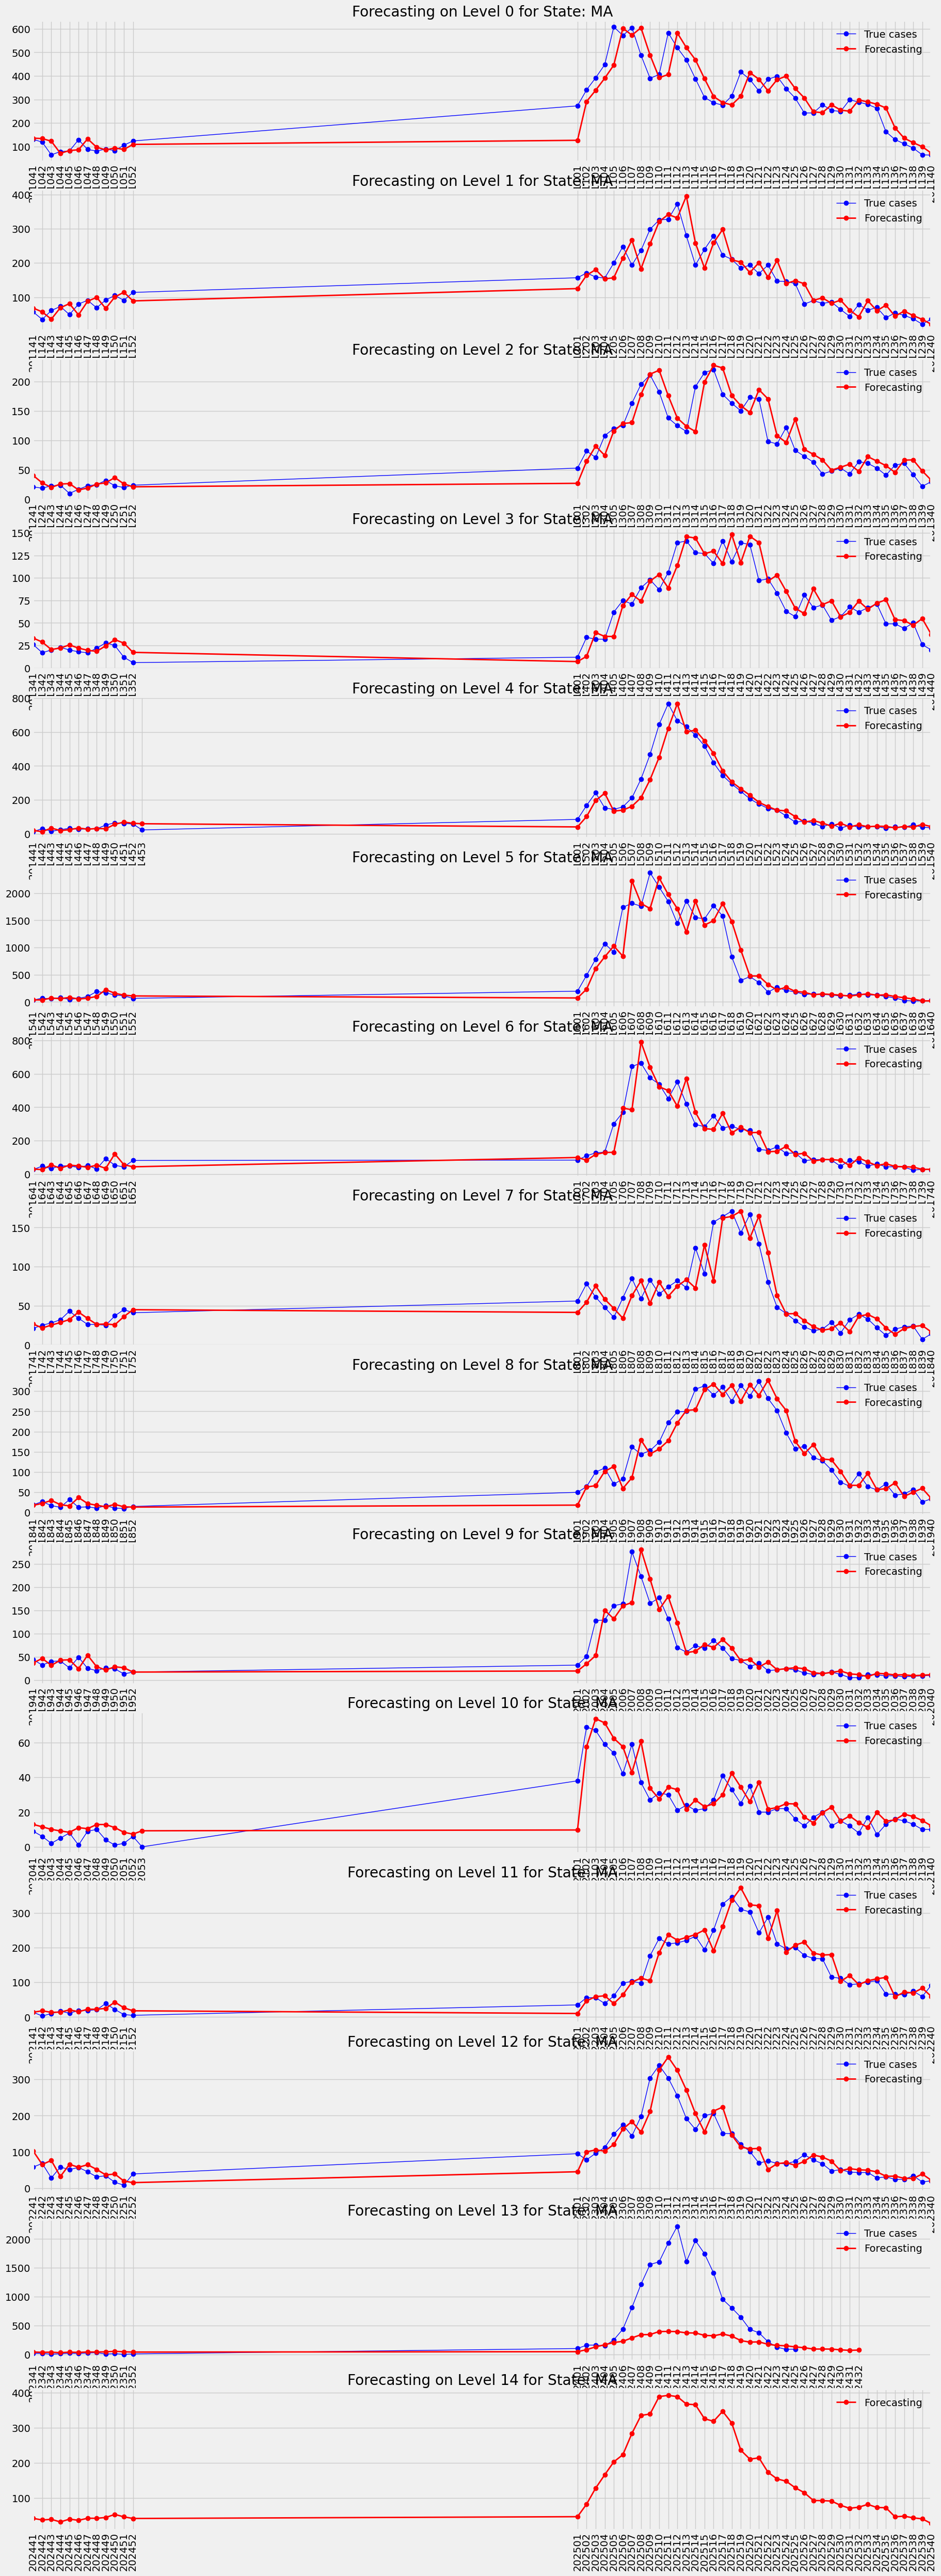

no_of_levels : 15
n_steps: 1
X shape: (755, 2)
X_train shape: (755, 1, 2)
y_train shape: (755,)
X_test shape: (53, 1, 2)
Total MSE on the Prediction : 84699.36738852841 when L is 1


<Figure size 1000x500 with 0 Axes>

In [15]:
# final ensemble of hybrid CNN-LSTM model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Input
from tensorflow.keras.optimizers import Adam
from math import sqrt
from keras.layers import LSTM, Dense, Input
import os
import csv
import numpy as np

# need to change here for different locations
model_name= ['CNN_LSTM_RMSE_ENSEMBLE_MODEL']
selected_state_name = 'MA'
no_of_levels        = 15  # Updated to include levels up to 15
dfm                 = df[['epiweek', selected_state_name]]
# Penalty on the error
L = 1


# Define the function to create training and validation splits
def training_splits(df, levels):
    splits = []
    for i in range(1, levels + 1):
        x_start = 201001
        x_end = 201000 + (26 + (i - 1) * 100)
        y_start = 201040 + (100 * (i - 1))
        y_end = y_start + 100
        x_split = df[df['epiweek'].between(x_start, x_end)]
        y_split = df[df['epiweek'].between(y_start, y_end)]
        splits.append((x_split, y_split))
    return splits

# Function to split a univariate sequence
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Create splits for the defined levels
splits = training_splits(dfm, no_of_levels)



def calculate_weights(rmse_scores):
    penalties = 1 / np.array(rmse_scores)
    total_penalty = np.sum(penalties)
    weights = penalties / total_penalty
    return weights

# def ensemble_predictions(prediction_vectors, weights):
#     prediction_vectors = np.array(prediction_vectors)
#     weighted_sum = np.sum(prediction_vectors * weights[:, np.newaxis], axis=0)
#     return weighted_sum

def ensemble_predictions(prediction_vectors, weights):
    """
    Compute the weighted average of prediction vectors from different models.

    Parameters:
    prediction_vectors (list of np.array): List of prediction vectors from different models.
    weights (np.array): Weights for each model.

    Returns:
    np.array: Final ensemble prediction vector.
    """
    # Convert list of prediction vectors to a numpy array with shape (num_models, num_samples, 1)
    prediction_vectors = np.array(prediction_vectors)

    # Ensure weights is a 1D array with shape (num_models,)
    weights = np.array(weights)

    # Reshape weights to (num_models, 1, 1) to align with prediction_vectors shape (num_models, num_samples, 1)
    weights = weights[:, np.newaxis, np.newaxis]

    # Compute the weighted sum
    weighted_sum = np.sum(prediction_vectors * weights, axis=0)

    return weighted_sum


# Initialize lists to store forecasts and training data
all_model_forecasts              = []
all_X_trains                     = []
all_prev_level_X_pred            = []
all_prev_level_true_data         = []
all_model_r2_score               = []
all_model_forecasting_r2_score   = []
# Create subplots

# Function to define and compile CNN-LSTM model
def build_cnn_lstm_model(filters, kernel_size, learning_rate, n_steps, n_features):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Conv1D(filters=filters//2, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(30))
    model.add(Dense(10))
    model.add(Dense(1))
    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
    return model



fig, ax = plt.subplots(len(splits), 1, figsize=(20, 60))

if len(splits) == 1:
    ax = [ax]

# Initialize a variable to store residuals from the previous level
previous_residuals = np.zeros(25)
# Initialize mse score for each training
mse_scores  = []

# Split the training, test, and predict
# Choose a number of time steps
n_steps       = 1           # Half of window size
# Input for LSTM and CNN
n_seq         = 1
n_features    = 2
# filters_vec = [32, 64, 128, 256, 512]
filters_vec = [128, 256]
#filters_vec = [64]

# Define ensemble parameters

for i, (train, val) in enumerate(splits):
    train_new_data = train[selected_state_name].to_numpy()
    val_new_data = val[selected_state_name].to_numpy()
    X, y = split_sequence(train_new_data, n_steps)
    print("Shape before reshaping:", X.shape)
    y_start = 201041 + (100 * (i))
    y_end = y_start + 99

    # Handling X for different levels
    if i == 0:
        # For level 0, the second column is zeros
        zero_feature = np.zeros((X.shape[0], 1))
        X = np.concatenate((X, zero_feature), axis=1)
    else:
        new_index = splits[i-1][0].shape[0]-1
        print(new_index)
        X = np.concatenate((X[:, :1], previous_residuals[0:len(X[:, :1])].reshape(-1, 1)), axis=1)  # Ensure two columns
    # print(i)
    # print(X)
    n_features = X.shape[1]                                                                         # Adjusted to handle multiple features
    num_output_features = 1
    X_train = X
    y_train = y

    if 0 <= i < 12:
        X_test, y_test = split_sequence(val_new_data, n_steps)
        X_test_zero_feature = np.zeros((X_test.shape[0], 1))
        X_test = np.concatenate((X_test, X_test_zero_feature), axis=1)
    elif i == 12:
      # Calculate the mean across all 11 levels
        # fake_X_pred_12 = np.mean(all_prev_level_X_pred[:11], axis=0)
        X_test = np.array([[value[0, 0], 0] for value in fake_X_pred_12])
        # X_test = np.array([[value[0, 0], 0] for value in fake_X_pred])
        X_test = X_test[:-1]  # Adjust for the length
        y_test = fake_true_data[:-1]
        print(f'X_test {i}')
        print(X_test)
        X_pred_new, y_pred_new = split_sequence(val_new_data, n_steps)
        X_pred_new_zero_feature = np.zeros((X_pred_new.shape[0], 1))
        X_pred_new_new = np.concatenate((X_pred_new, X_pred_new_zero_feature), axis=1)

    elif i == 13:
        new_mean_values = []
        # Determine the maximum length of arrays in all_prev_level_X_pred
        max_length = max(len(pred) for pred in all_prev_level_X_pred[:13])         # fake_X_pred_12 = np.mean(all_prev_level_X_pred[:11], axis=0)
        for l in range(max_length):
            # Collect corresponding elements from all arrays (where available)
            same_position_elements = [pred[l] for pred in all_prev_level_X_pred if len(pred) > l]
            # Calculate the mean of those elements
            new_mean_values.append(np.mean(same_position_elements, axis=0))
        # Convert mean_values to a NumPy array
        fake_X_pred_13    = np.array(new_mean_values)
        X_test = np.array([[value[0, 0], 0] for value in fake_X_pred_13])
        print(f'X_test {i}')
        print(X_test)
        #X_test = np.array([[value[0, 0], 0] for value in fake_X_pred])
        y_test = fake_true_data

        # collect this data for the X-pred in level 14
        X_pred_new, y_pred_new = split_sequence(val_new_data, n_steps)
        X_pred_new_zero_feature = np.zeros((X_pred_new.shape[0], 1))
        X_pred_new_new_level_13 = np.concatenate((X_pred_new, X_pred_new_zero_feature), axis=1)


    else:
        new_mean_values = []
        # Determine the maximum length of arrays in all_prev_level_X_pred
        max_length = max(len(pred) for pred in all_prev_level_X_pred[:14])         # fake_X_pred_12 = np.mean(all_prev_level_X_pred[:11], axis=0)
        for l in range(max_length):
            # Collect corresponding elements from all arrays (where available)
            same_position_elements = [pred[l] for pred in all_prev_level_X_pred if len(pred) > l]
            # Calculate the mean of those elements
            new_mean_values.append(np.mean(same_position_elements, axis=0))
        # Convert mean_values to a NumPy array
        fake_X_pred_14    = np.array(new_mean_values)
        X_test = np.array([[value[0, 0], 0] for value in fake_X_pred_14])
        print(f'X_test {i}')
        print(X_test)
        y_test = fake_true_data

    # Ensure X_train and X_test have the correct shape
    X_train = X_train.reshape((X_train.shape[0], n_steps, n_features))
    X_test = X_test.reshape((X_test.shape[0], n_steps, n_features))

    # Ensemble predictions
    ensemble_predictions_vec   = []
    ensemble_rmse_scores_vec   = []
    for j in range(len(filters_vec)):
        filters     = filters_vec[j]
        kernel_size = 1  # Ensure kernel_size <= n_steps
        learning_rate = 0.0001
        # Build and train the model
        model = build_cnn_lstm_model(filters, kernel_size, learning_rate, n_steps, n_features)
        model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=5, verbose=0)

        # Make predictions and store
        yhat = model.predict(X_test, verbose=0)
        ensemble_predictions_vec.append(yhat)
        if len(yhat)== 52:
          yhat = yhat
        else:
          yhat = yhat[:-1]
        if len(y_test)== 52:
          y_test = y_test
        else:
          y_test = y_test[:-1]
        new_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, yhat))
        ensemble_rmse_scores_vec.append(new_ensemble_rmse_scores)

    # Average ensemble predictions
    mean_ensemble_predictions = np.mean(ensemble_predictions_vec, axis=0)
    ensemble_predictions_vec.append(mean_ensemble_predictions)
    if len(mean_ensemble_predictions)==52:
      mean_ensemble_predictions = mean_ensemble_predictions
    else:
      mean_ensemble_predictions = mean_ensemble_predictions[:-1]
    new_mean_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, mean_ensemble_predictions))
    ensemble_rmse_scores_vec.append(new_mean_ensemble_rmse_scores)
    ensemble_weights     = calculate_weights(ensemble_rmse_scores_vec)
    new_ensemble_predictions = ensemble_predictions(ensemble_predictions_vec, ensemble_weights)

    # Evaluate the best model
    if 0<=i<14:
      y_test_regular = y_test
    else:
      # Convert fake_true_data to the for level 14
      level_14_true_data = np.array([value for value in fake_true_data])
      level_14_true_data = np.array(level_14_true_data)
      y_test_regular = level_14_true_data
    #yhat_regular_cnn = best_model.predict(X_test, verbose=0)
    yhat_regular_cnn       = new_ensemble_predictions
    if len(y_test_regular) == len(yhat_regular_cnn):
      print('Best Test RMSE:', sqrt(mean_squared_error(y_test_regular, yhat_regular_cnn)))
      print('Best Test R2 Score:', r2_score(y_test_regular, yhat_regular_cnn))
      colect_r2_score = r2_score(y_test_regular, yhat_regular_cnn)
    else:
      yhat_regular_cnn = yhat_regular_cnn[:-1]
      print('Best Test RMSE:', sqrt(mean_squared_error(y_test_regular, yhat_regular_cnn)))
      print('Best Test R2 Score:', r2_score(y_test_regular, yhat_regular_cnn))
      colect_r2_score = r2_score(y_test_regular, yhat_regular_cnn)

    all_model_r2_score.append(colect_r2_score)

    if 0<=i <12:
      pred_epiweeks = dfm[dfm['epiweek'].between(y_start, y_end)]['epiweek']
      true_data = dfm[dfm['epiweek'].between(y_start, y_end)][selected_state_name]
      X_pred         = X_test
    elif i==12:
      pred_epiweeks  =  list(range(202241, 202253)) + list(range(202301, 202341))
      true_data      = fake_true_data
      #X_pred         = X_test      # this is the actual in main code
      X_pred        = fake_X_pred_12   # we need to check here
    elif i==13:
      pred_epiweeks  =  list(range(202341, 202353)) + list(range(202401, 202441))
      true_data      = fake_true_data
      #X_pred         = X_test      # this is the actual in main code
      X_pred        = fake_X_pred_13   # we need to check here
    else:
      pred_epiweeks =  list(range(202441, 202453)) + list(range(202501, 202541))
      true_data     = fake_true_data
      X_pred        = fake_X_pred_14

    if 0<=i<12:
      print(f'true_data len {len(true_data)}  with i : {i}')
      print(true_data.values)
      print(f'X_pred len {len(true_data)}  with i : {i}')
      print(X_pred)


      # Ensemble predictions
      ensemble_predictions_vec   = []
      ensemble_rmse_scores_vec   = []
      # Loop through ensemble models for the number of ensemble_size
      for j in range(len(filters_vec)):
          filters     = filters_vec[j]
          kernel_size = 1  # Ensure kernel_size <= n_steps
          learning_rate = 0.0001
          # Build and train the model
          model = build_cnn_lstm_model(filters, kernel_size, learning_rate, n_steps, n_features)
          model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=5, verbose=0)

          # Make predictions and store
          yhat = model.predict(X_test, verbose=0)
          ensemble_predictions_vec.append(yhat)
          # new line using ensemble
          #new_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, ensemble_predictions))
          if len(yhat)== 52:
            yhat = yhat
          else:
            yhat = yhat[:-1]
          if len(y_test)== 52:
            y_test = y_test
          else:
            y_test = y_test[:-1]
          new_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, yhat))
          ensemble_rmse_scores_vec.append(new_ensemble_rmse_scores)

      # Average ensemble predictions
      mean_ensemble_predictions = np.mean(ensemble_predictions_vec, axis=0)
      ensemble_predictions_vec.append(mean_ensemble_predictions)
      if len(mean_ensemble_predictions)== 52:
        mean_ensemble_predictions = mean_ensemble_predictions
      else:
        mean_ensemble_predictions = mean_ensemble_predictions[:-1]
      if len(y_test)== 52:
        y_test = y_test
      else:
        y_test = y_test[:-1]
      new_mean_ensemble_rmse_scores = sqrt(mean_squared_error(y_test,  mean_ensemble_predictions))
      ensemble_rmse_scores_vec.append(new_mean_ensemble_rmse_scores)
      ensemble_weights     = calculate_weights(ensemble_rmse_scores_vec)
      new_ensemble_predictions = ensemble_predictions(ensemble_predictions_vec, ensemble_weights)

      model_forecast      = new_ensemble_predictions


      print(f'model_forecast len {len(model_forecast)}   with i : {i}')
      print(model_forecast)
      difference = true_data.values  - model_forecast.squeeze()    # model_forecast.squeeze() males an array as we true_data.values - model_forecast
      residuals = difference
      print(f'residuals for {i} of {len(residuals)}')
      print(residuals)
      print(f'X_pred for {i} of {len(X_pred)}')
      print(X_pred)
    else:
      print(f'true_data len {len(true_data)}  with i : {i}')
      print(true_data)
      print(f'X_pred len {len(true_data)}  with i : {i}')
      print(X_pred)


     # New Ensemble predictions
      ensemble_predictions_vec   = []
      ensemble_rmse_scores_vec   = []
      #for j in range(ensemble_size):
      for j in range(len(filters_vec)):
          filters     = filters_vec[j]
          kernel_size = 1  # Ensure kernel_size <= n_steps
          learning_rate = 0.0001
          # Build and train the model
          model = build_cnn_lstm_model(filters, kernel_size, learning_rate, n_steps, n_features)
          model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=5, verbose=0)

          # Make predictions and store
          yhat = model.predict(X_test, verbose=0)
          ensemble_predictions_vec.append(yhat)
          # new line using ensemble
          #new_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, ensemble_predictions))
          if len(yhat)== 52:
            yhat = yhat
          else:
            yhat = yhat[:-1]
          if len(y_test)== 52:
            y_test = y_test
          else:
            y_test = y_test[:-1]
          new_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, yhat))
          ensemble_rmse_scores_vec.append(new_ensemble_rmse_scores)

      # Average ensemble predictions
      mean_ensemble_predictions = np.mean(ensemble_predictions_vec, axis=0)
      ensemble_predictions_vec.append(mean_ensemble_predictions)
      if len(mean_ensemble_predictions)== 52:
       mean_ensemble_predictions = mean_ensemble_predictions
      else:
       mean_ensemble_predictions = mean_ensemble_predictions[:-1]
      if len(y_test)== 52:
       y_test = y_test
      else:
       y_test = y_test[:-1]
      new_mean_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, mean_ensemble_predictions))
      ensemble_rmse_scores_vec.append(new_mean_ensemble_rmse_scores)
      ensemble_weights     = calculate_weights(ensemble_rmse_scores_vec)
      new_ensemble_predictions = ensemble_predictions(ensemble_predictions_vec, ensemble_weights)

      model_forecast       = new_ensemble_predictions


      print(f'model_forecast len {len(model_forecast)}   with i : {i}')
      print(model_forecast)
      if len(true_data)==52:
        true_data = true_data
      else:
        true_data = true_data[:-1]
      if len(model_forecast)==52:
        model_forecast = model_forecast
      else:
        model_forecast = model_forecast[:-1]
      difference = true_data  - model_forecast.squeeze()    # model_forecast.squeeze() males an array as we true_data.values - model_forecast
      residuals = difference
      print(f'residuals for {i} of {len(residuals)}')
      print(residuals)
      print(f'X_pred for {i} of {len(X_pred)}')
      print(X_pred)
    if 0<=i<12:
      X_pred         = X_test
      # Ensure that the shape of residuals matches the second column of X_pred
      if i in [4, 10]:
        for l in range(len(X_pred)-1):
            print(f'len(X_pred) is {len(X_pred)} for {i}')
            X_pred[l+1, :, 1] = residuals[l]
      else:
        for l in range(len(X_pred)-1):
            X_pred[l+1, :, 1] = residuals[l]
      # Print the modified X_pred to verify
      print(f'Print the modified X_pred to verify for {i} of {len(X_pred)}')
      print(X_pred)

      # New Ensemble predictions
      ensemble_predictions_vec   = []
      ensemble_rmse_scores_vec   = []
      for j in range(len(filters_vec)):
          filters     = filters_vec[j]
          kernel_size = 1  # Ensure kernel_size <= n_steps
          learning_rate = 0.0001
          # Build and train the model
          model = build_cnn_lstm_model(filters, kernel_size, learning_rate, n_steps, n_features)
          model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=5, verbose=0)

          # Make predictions and store
          yhat = model.predict(X_test, verbose=0)
          ensemble_predictions_vec.append(yhat)
          # new line using ensemble
          if len(yhat)== 52:
            yhat = yhat
          else:
            yhat = yhat[:-1]
          if len(y_test)== 52:
            y_test = y_test
          else:
            y_test = y_test[:-1]
          new_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, yhat))
          ensemble_rmse_scores_vec.append(new_ensemble_rmse_scores)


      # Average ensemble predictions
      mean_ensemble_predictions = np.mean(ensemble_predictions_vec, axis=0)
      ensemble_predictions_vec.append(mean_ensemble_predictions)
      if len(mean_ensemble_predictions)== 52:
        mean_ensemble_predictions = mean_ensemble_predictions
      else:
        mean_ensemble_predictions = mean_ensemble_predictions[:-1]
      if len(y_test)== 52:
        y_test = y_test
      else:
        y_test = y_test[:-1]
      new_mean_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, mean_ensemble_predictions))
      ensemble_rmse_scores_vec.append(new_mean_ensemble_rmse_scores)
      ensemble_weights     = calculate_weights(ensemble_rmse_scores_vec)
      new_ensemble_predictions = ensemble_predictions(ensemble_predictions_vec, ensemble_weights)

      model_forecast       = new_ensemble_predictions


      print(f'new model_forecast len {len(model_forecast)}   with residual in X_pred i : {i}')
      print(model_forecast)
      print(f'residuals for {i} of {len(residuals)}')
      print(residuals)
      print(f'X_train {i} of {len(X_train)}')
      print(X_train)

      # Add model_forecast to list
      all_prev_level_X_pred.append(X_pred)
      # print(f'length of all_prev_level_X_pred data {len(all_prev_level_X_pred)} for {i}')
      # print(all_prev_level_X_pred)
      all_prev_level_true_data.append(true_data)

      if i==11:
        # mean calculation for the using the test data from the level 0 to 11 that will be used in level 12 : test 1
        new_mean_values = []
        # Determine the maximum length of arrays in all_prev_level_X_pred
        max_length = max(len(pred) for pred in all_prev_level_X_pred[:12])         # fake_X_pred_12 = np.mean(all_prev_level_X_pred[:11], axis=0)
        for l in range(max_length):
            # Collect corresponding elements from all arrays (where available)
            same_position_elements = [pred[l] for pred in all_prev_level_X_pred if len(pred) > l]
            # Calculate the mean of those elements
            new_mean_values.append(np.mean(same_position_elements, axis=0))
        # Convert mean_values to a NumPy array
        fake_X_pred_12    = np.array(new_mean_values)

        # this has added on Aug 14 on 6:17 pm to compute the fake_true_data
        # mean calculation for the using the test data from the level 0 to 11 that will be used in level 12 : test 1
        true_data_mean_values = []
        max_length = max(len(pred) for pred in all_prev_level_true_data)

        for l in range(max_length):
            # try:
            #     print(f"Processing position {l}...")
          # Convert to NumPy arrays if necessary
          same_position_elements = [np.array(pred)[l] if not isinstance(pred, np.ndarray) else pred[l]
                                    for pred in all_prev_level_true_data if len(pred) > l]
          # Calculate the mean of those elements
          mean_value = np.mean(same_position_elements, axis=0)
          true_data_mean_values.append(mean_value)
        # this has updated in level 11 that will be useful in label 12
        fake_true_data = true_data_mean_values

        # fake_true_data = true_data_mean_values
    else:
      if i==12:
        forecasting_y_start = 202241
        forecasting_y_end   = 202340
        forecasting_true_data     = dfm[dfm['epiweek'].between(forecasting_y_start, forecasting_y_end)][selected_state_name]
        all_prev_level_true_data.append(forecasting_true_data)
        X_pred = X_pred_new_new.reshape(-1, 1, 2)
        for l in range(len(X_pred)-1):
          X_pred[l+1, :, 1] = residuals[l]
      elif i==13:
        forecasting_y_start = 202341
        forecasting_y_end   = 202440
        forecasting_true_data     = dfm[dfm['epiweek'].between(forecasting_y_start, forecasting_y_end)][selected_state_name]
        all_prev_level_true_data.append(forecasting_true_data)
        # X_pred = X_pred_new_new_new.reshape(-1, 1, 2)
        # for l in range(len(X_pred)-1):
        #   X_pred[l+1, :, 1] = residuals[l]
      else:
        X_pred = X_pred_new_new_level_13.reshape(-1,1,2)
        for l in range(len(X_pred)-1):
          X_pred[l+1, :, 1] = residuals[l]

      # Print the modified X_pred to verify
      print(X_pred)
      all_prev_level_X_pred.append(X_pred)                                      # still we are colecting for the next level
      print(f'length of all_prev_level_X_pred data {len(all_prev_level_X_pred)} for {i}')
      print(all_prev_level_X_pred)

      # New Ensemble predictions
      ensemble_predictions_vec   = []
      ensemble_rmse_scores_vec   = []
      # Loop through ensemble models for the number of ensemble_size
      for j in range(len(filters_vec)):
          filters     = filters_vec[j]
          kernel_size = 1  # Ensure kernel_size <= n_steps
          learning_rate = 0.0001
          # Build and train the model
          model = build_cnn_lstm_model(filters, kernel_size, learning_rate, n_steps, n_features)
          model.fit(X_train, y_train, epochs=100, validation_split=0.1, batch_size=5, verbose=0)
          if 0<=i<14:
            X_test = X_pred  # fake_X_pred
          else:
            X_test = fake_X_pred_14
          # Make predictions and store
          yhat = model.predict(X_test, verbose=0)
          ensemble_predictions_vec.append(yhat)
          if len(yhat)== 52:
            yhat = yhat
          else:
            yhat = yhat[:-1]
          if len(y_test)== 52:
            y_test = y_test
          else:
            y_test = y_test[:-1]
          # new line using ensemble
          #new_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, ensemble_predictions))
          new_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, yhat))
          ensemble_rmse_scores_vec.append(new_ensemble_rmse_scores)

      # Average ensemble predictions
      mean_ensemble_predictions = np.mean(ensemble_predictions_vec, axis=0)
      ensemble_predictions_vec.append(mean_ensemble_predictions)
      if len(mean_ensemble_predictions)== 52:
        mean_ensemble_predictions = mean_ensemble_predictions
      else:
        mean_ensemble_predictions = mean_ensemble_predictions[:-1]
      if len(y_test)== 52:
        y_test = y_test
      else:
        y_test = y_test[:-1]
      new_mean_ensemble_rmse_scores = sqrt(mean_squared_error(y_test, mean_ensemble_predictions))
      ensemble_rmse_scores_vec.append(new_mean_ensemble_rmse_scores)
      ensemble_weights     = calculate_weights(ensemble_rmse_scores_vec)
      new_ensemble_predictions = ensemble_predictions(ensemble_predictions_vec, ensemble_weights)

      model_forecast       = new_ensemble_predictions


      true_data_mean_values = []
      max_length = max(len(pred) for pred in all_prev_level_true_data)

      for l in range(max_length):
          # try:
          #     print(f"Processing position {l}...")
        # Convert to NumPy arrays if necessary
        same_position_elements = [np.array(pred)[l] if not isinstance(pred, np.ndarray) else pred[l]
                                  for pred in all_prev_level_true_data if len(pred) > l]

        # Calculate the mean of those elements
        mean_value = np.mean(same_position_elements, axis=0)
        true_data_mean_values.append(mean_value)

      fake_true_data = true_data_mean_values
      if len(fake_true_data) ==52:
        fake_true_data = fake_true_data
        for l in range(len(X_pred)):
          X_pred[l+1, :, 1] = residuals[l]
      else:
        fake_true_data = fake_true_data[:-1]

        # for l in range(len(X_pred)-1):
        #   X_pred[l+1, :, 1] = residuals[l]

      # Convert true_data_mean_values to a NumPy array
      print(f'fake_true_data and its length is {len(fake_true_data)} with level {i}')
      print(fake_true_data)

    # Add model_forecast to list
    all_model_forecasts.append(model_forecast)
    # forecasting_r_2_score = r2_score(true_data, model_forecast)
    # all_model_forecasting_r2_score.append(forecasting_r_2_score)

    # Store X_train for current level
    all_X_trains.append(X_train.reshape(X_train.shape[0], -1))  # Flatten for saving

    if 0<=i<12:
      print(f'true_data len {len(true_data)}  with i : {i}')
      print(true_data.values)
      # Making predictions
      print(f'model_forecast len {len(model_forecast)}   with i : {i}')
      print(model_forecast)
      difference = true_data.values  - model_forecast.squeeze()    # model_forecast.squeeze() males an array as we true_data.values - model_forecast
      residuals = difference
      residuals = true_data.values - model_forecast.squeeze()  # Convert true_data to numpy array
      residuals = L * residuals
      # debugging
      print(f'residuals for {i} of {len(residuals)}')
      print(residuals)
    else:  # if 12<=i<=13:
      print(f'fake_true_data {len(fake_true_data)}  with i : {i}')
      print(fake_true_data)
      print(f'model_forecast len {len(model_forecast)}   with i : {i}')
      print(model_forecast)
      if len(model_forecast)==52:
        model_forecast=model_forecast
      else:
        model_forecast = model_forecast[:-1]
      if len(fake_true_data) ==52:
        fake_true_data =fake_true_data
      else:
        fake_true_data = fake_true_data[:-1]
      residuals = fake_true_data - model_forecast.squeeze()  # Convert true_data to numpy array.         true_data.values
      residuals = L * residuals
      # debugging
      print(f'residuals for {i} of {len(residuals)}')
      print(residuals)

    if i == 0:
        previous_residuals = np.concatenate((np.zeros(40), residuals))
    elif 0 < i < 14:
        previous_residuals = np.concatenate((previous_residuals, residuals))
    else:
        previous_residuals = np.concatenate((previous_residuals, residuals))

    # debugging
    print(f'previous_residuals for {i} of {len(previous_residuals)}')
    print(previous_residuals)



    # this is all about the plot
    # np.linspace(1, len(pred_epiweeks),len(pred_epiweeks))
    if 0<=i<12:
      # ax[i].plot(pred_epiweeks, true_data.values, marker='o', linestyle='-', color='blue', linewidth=1, label='True cases')
      # ax[i].plot(pred_epiweeks, model_forecast.squeeze(), marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      ax[i].plot(pred_epiweeks, true_data.values, marker='o', linestyle='-', color='blue', linewidth=1, label='True cases')
      ax[i].plot(pred_epiweeks, model_forecast.squeeze(), marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      # Set x-axis limits and labels
      tick_start = y_start
      tick_end = y_end
      # Adjust the new tick position
      new_tick_positions = np.array(dfm[dfm['epiweek'].between(y_start, y_end)]['epiweek'])
      tick_labels = [f'{int(week):04d}' for week in new_tick_positions]
      ax[i].set_xticks(new_tick_positions)
      ax[i].set_xticklabels(tick_labels, rotation=90)
      ax[i].set_xlim([tick_start, tick_end])
      ax[i].legend(frameon=False)
      ax[i].set_title(f'Forecasting on Level {i} for State: {selected_state_name}')
      print(f'Level {i + 1} - Tick Start: {tick_start}, Tick End: {tick_end}, Positions: {new_tick_positions}')

      # Calculate MSE for the current level
      if len(true_data) == len(model_forecast):
        mse = mean_squared_error(true_data, model_forecast)
      else:
        true_data = true_data[:-1]
        mse = mean_squared_error(true_data, model_forecast)

      mse_scores.append(mse)
      print(f'Mean squared error : {mse} when training level is i : {i}')

    elif i==12:
      forecasting_y_start = 202241
      forecasting_y_end   = 202340
      forecasting_pred_epiweeks = dfm[dfm['epiweek'].between(forecasting_y_start, forecasting_y_end)]['epiweek']
      forecasting_true_data     = dfm[dfm['epiweek'].between(forecasting_y_start, forecasting_y_end)][selected_state_name]
      ax[i].plot(forecasting_pred_epiweeks, forecasting_true_data.values, marker='o', linestyle='-', color='blue', linewidth=1, label='True cases')
      ax[i].plot(forecasting_pred_epiweeks, model_forecast.squeeze(), marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      # ax[i].plot(forecasting_pred_epiweeks, forecasting_true_data, marker='o', linestyle='-', color='blue', linewidth=1, label='True cases')
      # ax[i].plot(forecasting_pred_epiweeks, model_forecast, marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      # Set x-axis limits and labels
      tick_start = forecasting_y_start
      tick_end = forecasting_y_end
      # Adjust the new tick position
      new_tick_positions = np.array(dfm[dfm['epiweek'].between(y_start, y_end)]['epiweek'])
      tick_labels = [f'{int(week):04d}' for week in new_tick_positions]
      ax[i].set_xticks(new_tick_positions)
      ax[i].set_xticklabels(tick_labels, rotation=90)
      ax[i].set_xlim([tick_start, tick_end])
      ax[i].legend(frameon=False)
      ax[i].set_title(f'Forecasting on Level {i} for State: {selected_state_name}')
      print(f'Level {i + 1} - Tick Start: {tick_start}, Tick End: {tick_end}, Positions: {new_tick_positions}')

      # Calculate MSE for the current level
      if len(true_data) == len(model_forecast):
        mse = mean_squared_error(true_data, model_forecast)
      else:
        true_data = true_data[:-1]
        mse = mean_squared_error(true_data, model_forecast)

      mse_scores.append(mse)
      print(f'Mean squared error : {mse} when training level is i : {i}')

      print(f'for {i} forecasting length {len(model_forecast)} and pred length {len(forecasting_pred_epiweeks)}')
      print(model_forecast)
    elif i==13:
      forecasting_y_start = 202341
      forecasting_y_end   = 202440
      true_y_end          = 202425
      forecasting_pred_epiweeks = dfm[dfm['epiweek'].between(forecasting_y_start, forecasting_y_end)]['epiweek']
      forecasting_true_epiweeks = dfm[dfm['epiweek'].between(forecasting_y_start, true_y_end)]['epiweek']
      forecasting_true_data     = dfm[dfm['epiweek'].between(forecasting_y_start, true_y_end)][selected_state_name]
      if len(forecasting_pred_epiweeks) != len(model_forecast):
        model_forecast_short = model_forecast[:len(forecasting_pred_epiweeks)]
      ax[i].plot(forecasting_true_epiweeks, forecasting_true_data, marker='o', linestyle='-', color='blue', linewidth=1, label='True cases')
      ax[i].plot(forecasting_pred_epiweeks[:len(model_forecast_short)], model_forecast_short, marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      #ax[i].plot(forecasting_pred_epiweeks, model_forecast, marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      # Set x-axis limits and labels
      tick_start = forecasting_y_start
      tick_end = forecasting_y_end
      # Adjust the new tick position
      new_tick_positions = np.array(dfm[dfm['epiweek'].between(y_start, y_end)]['epiweek'])
      tick_labels = [f'{int(week):04d}' for week in new_tick_positions]
      ax[i].set_xticks(new_tick_positions)
      ax[i].set_xticklabels(tick_labels, rotation=90)
      ax[i].set_xlim([tick_start, tick_end])
      ax[i].legend(frameon=False)
      ax[i].set_title(f'Forecasting on Level {i} for State: {selected_state_name}')
      print(f'Level {i + 1} - Tick Start: {tick_start}, Tick End: {tick_end}, Positions: {new_tick_positions}')

      # Calculate MSE for the current level
      if len(true_data) == len(model_forecast):
        mse = mean_squared_error(true_data, model_forecast)
      else:
        true_data = true_data[:-1]
        mse = mean_squared_error(true_data, model_forecast)

      mse_scores.append(mse)
      print(f'Mean squared error : {mse} when training level is i : {i}')
      print(f'for {i} forecasting length {len(model_forecast)} and pred length {len(forecasting_pred_epiweeks)}   with i : {i}')
      print(model_forecast)
    else:
      forecasting_y_start = 202441
      forecasting_y_end   = 202540
      # forecasting_pred_epiweeks = dfm[dfm['epiweek'].between(forecasting_y_start, forecasting_y_end)]['epiweek']
      forecasting_pred_epiweeks = [202441, 202442, 202443, 202444, 202445, 202446, 202447, 202448, 202449, 202450,
        202451, 202452, 202501, 202502, 202503, 202504, 202505, 202506, 202507, 202508,
        202509, 202510, 202511, 202512, 202513, 202514, 202515, 202516, 202517, 202518,
        202519, 202520, 202521, 202522, 202523, 202524, 202525, 202526, 202527, 202528,
        202529, 202530, 202531, 202532, 202533, 202534, 202535, 202536, 202537, 202538,
        202539, 202540]
      # Plot the forecasting data if the lengths match
      #if len(forecasting_pred_epiweeks) == len(model_forecast):
      ax[i].plot(forecasting_pred_epiweeks, model_forecast, marker='o', linestyle='-', color='red', linewidth=2, label='Forecasting')
      #else
       ## print(f'forecasting_pred_epiweeks shape: {forecasting_pred_epiweeks.shape}')
          # print(f'model_forecast shape: {model_forecast.shape}')
      # Set x-axis limits and labels
      tick_start = forecasting_y_start
      tick_end = forecasting_y_end
      # Adjust the new tick positions
      new_tick_positions = np.array(forecasting_pred_epiweeks)
      tick_labels = [f'{int(week):04d}' for week in new_tick_positions]
      ax[i].set_xticks(new_tick_positions)
      ax[i].set_xticklabels(tick_labels, rotation=90)
      ax[i].set_xlim([tick_start, tick_end])
      # Add a legend
      ax[i].legend(frameon=False)
      # Set the title
      ax[i].set_title(f'Forecasting on Level {i} for State: {selected_state_name}')
      # Print tick information for debugging
      print(f'Level {i + 1} - Tick Start: {tick_start}, Tick End: {tick_end}, Positions: {new_tick_positions}')

      # Calculate MSE for the current level
      if len(true_data) == len(model_forecast):
        mse = mean_squared_error(true_data, model_forecast)
      else:
        true_data = true_data[:-1]
        mse = mean_squared_error(true_data, model_forecast)

      mse_scores.append(mse)
      print(f'Mean squared error : {mse} when training level is i : {i}')
      print(f'for {i} forecasting length {len(model_forecast)} and pred length {len(forecasting_pred_epiweeks)}   with i : {i}')
      print(model_forecast)
      plt.show()
      # Store X_train for current level
      #all_X_trains.append(X_train.reshape(X_train.shape[0], -1))  # Flatten for saving

# total training mse scores
total_mse_scores_each_L = sum(mse_scores)

print(f'no_of_levels : {no_of_levels}')
print(f'n_steps: {n_steps}')
print(f'X shape: {X.shape}')
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
# print(f'y_test shape: {y_test.shape}')
print(f'Total MSE on the Prediction : {total_mse_scores_each_L} when L is {L}')
plt.tight_layout()
plt.show()


# Save the Data
# Define the directory paths
forecast_dir = '/content/drive/MyDrive/Colab Notebook/Colab Notebook/infodengue2024/info_dengue_data_and_model'

# Create directories if they do not exist
if not os.path.exists(forecast_dir):
    os.makedirs(forecast_dir)

# selected_state_name = 'GO'
# Method 1: Flattening
all_residuals_output = X_train[:, :, 1].flatten()
new_X_train = X_train[:, :, 1]


# Define the file paths
x_train_path = os.path.join(forecast_dir, f'{selected_state_name}_{model_name}_all_X_train.csv')
all_residuals_output_path = os.path.join(forecast_dir, f'{selected_state_name}_{model_name}_all_residuals_output.csv')
forecast_path = os.path.join(forecast_dir, f'{selected_state_name}_{model_name}_all_model_forecasts.csv')
all_model_r2_score_path = os.path.join(forecast_dir, f'{selected_state_name}_{model_name}_all_model_r2_score.csv')


#save all_model_forecasts to CSV in row vector
# with open(forecast_path, 'w', newline='') as file:
#      writer = csv.writer(file)
#      for forecast in all_model_forecasts:
#          writer.writerow(forecast.flatten())


#save all_model_forecasts to CSV in column vector
max_len = max(arr.shape[0] for arr in all_model_forecasts)  # Determine the maximum length
# Pad arrays to have the same length
padded_forecasts = []
for arr in all_model_forecasts:
    if arr.shape[0] < max_len:
        # Pad with NaN or another value
        pad_width = max_len - arr.shape[0]
        padded_arr = np.pad(arr, ((0, pad_width), (0, 0)), mode='constant', constant_values=np.nan)
    else:
        padded_arr = arr
    padded_forecasts.append(padded_arr)
# Concatenate the padded arrays
forecasts_2d = np.hstack(padded_forecasts)
with open(forecast_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for forecast in forecasts_2d:
        writer.writerow(forecast.flatten())


# Save all_X_train to CSV
with open(x_train_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for x_train in all_X_trains:
        # Flatten array and save
        writer.writerow(x_train.flatten())

# Save all_X_train to CSV
with open(all_residuals_output_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for x_train in new_X_train:
        # Flatten array and save
        writer.writerow(x_train.flatten())


# Save all_model_r2_scoreto CSV
with open(all_model_r2_score_path, 'w', newline='') as file:
    writer = csv.writer(file)
    for r2_score in all_model_r2_score:
        # Flatten array and save
        writer.writerow(r2_score.flatten())